<a href="https://colab.research.google.com/github/monicagoma/actividades_machine_learning21/blob/main/ML_3_wdbc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 3 Machine Learning 

In [1]:
install.packages("caret")
install.packages("skimr")
install.packages("klaR")
install.packages("kernlab")
install.packages("e1071")
install.packages("moderndive")
install.packages("rpart.plot")
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sass’, ‘jquerylib’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘proxy’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘bslib’, ‘R.cache’, ‘e1071’, ‘shiny’, ‘miniUI’, ‘styler’, ‘classInt’, ‘labelled’, ‘combinat’, ‘questionr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘snakecase’, ‘operator.

In [2]:
library(devtools)
library(moderndive)
library(klaR)
library(kernlab)
library(e1071)
library(rpart)
library(rpart.plot)
library(ggplot2)
library(dplyr)
library(tidyverse)
library(caret)
library(skimr)
library(corrplot)

Loading required package: usethis

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Loading required package: MASS


Attaching package: ‘ggplot2’


The following object is masked from ‘package:kernlab’:

    alpha



Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.1     ✔ purrr   0.3.4
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::alpha() masks kernlab::alpha()
✖ purrr::cross()   masks kernlab::cross()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ dplyr::select()  masks MASS

5. Number of instances: 569 

6. Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)

7. Attribute information

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

In [3]:
df_wdbc <- read.table("wdbc.data", sep=",")
df_wdbc <- df_wdbc[,-c(1)]

In [4]:
colnames(df_wdbc)[1] <- "class"
colnames(df_wdbc)[2] <- "radius_mean"
colnames(df_wdbc)[3] <- "texture_mean"
colnames(df_wdbc)[4] <- "perimeter_mean"
colnames(df_wdbc)[5] <- "area_mean"
colnames(df_wdbc)[6] <- "smoothness_mean"
colnames(df_wdbc)[7] <- "compactness_mean"
colnames(df_wdbc)[8] <- "concavity_mean"
colnames(df_wdbc)[9] <- "concativitypoints_mean"
colnames(df_wdbc)[10] <- "symmetry_mean"
colnames(df_wdbc)[11] <- "fractal_dimension_mean"
colnames(df_wdbc)[12] <- "radius_se"
colnames(df_wdbc)[13] <- "texture_se"
colnames(df_wdbc)[14] <- "perimeter_se"
colnames(df_wdbc)[15] <- "area_se"
colnames(df_wdbc)[16] <- "smoothness_se"
colnames(df_wdbc)[17] <- "compactness_se"
colnames(df_wdbc)[18] <- "concavitty_se"
colnames(df_wdbc)[19] <- "concativitypoints_se"
colnames(df_wdbc)[20] <- "symmetry_se"
colnames(df_wdbc)[21] <- "fractal_dimension_se"
colnames(df_wdbc)[22] <- "radius_worst"
colnames(df_wdbc)[23] <- "texture_worst"
colnames(df_wdbc)[24] <- "perimeter_worst"
colnames(df_wdbc)[25] <- "area_worst"
colnames(df_wdbc)[26] <- "smoothness_worst"
colnames(df_wdbc)[27] <- "compactness_worst"
colnames(df_wdbc)[28] <- "concavity_worst"
colnames(df_wdbc)[29] <- "concativitypoints_worst"
colnames(df_wdbc)[30] <- "symmetry_worts"
colnames(df_wdbc)[31] <- "fractal_dimension_worst"
head(df_wdbc)

class radius_mean texture_mean perimeter_mean area_mean smoothness_mean
1 M     17.99       10.38        122.80         1001.0    0.11840        
2 M     20.57       17.77        132.90         1326.0    0.08474        
3 M     19.69       21.25        130.00         1203.0    0.10960        
4 M     11.42       20.38         77.58          386.1    0.14250        
5 M     20.29       14.34        135.10         1297.0    0.10030        
6 M     12.45       15.70         82.57          477.1    0.12780        
  compactness_mean concavity_mean concativitypoints_mean symmetry_mean ⋯
1 0.27760          0.3001         0.14710                0.2419        ⋯
2 0.07864          0.0869         0.07017                0.1812        ⋯
3 0.15990          0.1974         0.12790                0.2069        ⋯
4 0.28390          0.2414         0.10520                0.2597        ⋯
5 0.13280          0.1980         0.10430                0.1809        ⋯
6 0.17000          0.1578         0.08089                0.2087        ⋯
  radius_worst texture_worst perimeter_worst area_worst smoothness_worst
1 25.38        17.33         184.60          2019.0     0.1622          
2 24.99        23.41         158.80          1956.0     0.1238          
3 23.57        25.53         152.50          1709.0     0.1444          
4 14.91        26.50          98.87           567.7     0.2098          
5 22.54        16.67         152.20          1575.0     0.1374          
6 15.47        23.75         103.40           741.6     0.1791          
  compactness_worst concavity_worst concativitypoints_worst symmetry_worts
1 0.6656            0.7119          0.2654                  0.4601        
2 0.1866            0.2416          0.1860                  0.2750        
3 0.4245            0.4504          0.2430                  0.3613        
4 0.8663            0.6869          0.2575                  0.6638        
5 0.2050            0.4000          0.1625                  0.2364        
6 0.5249            0.5355          0.1741                  0.3985        
  fractal_dimension_worst
1 0.11890                
2 0.08902                
3 0.08758                
4 0.17300                
5 0.07678                
6 0.12440

In [5]:
summary(df_wdbc)

    class            radius_mean      texture_mean   perimeter_mean  
 Length:569         Min.   : 6.981   Min.   : 9.71   Min.   : 43.79  
 Class :character   1st Qu.:11.700   1st Qu.:16.17   1st Qu.: 75.17  
 Mode  :character   Median :13.370   Median :18.84   Median : 86.24  
                    Mean   :14.127   Mean   :19.29   Mean   : 91.97  
                    3rd Qu.:15.780   3rd Qu.:21.80   3rd Qu.:104.10  
                    Max.   :28.110   Max.   :39.28   Max.   :188.50  
   area_mean      smoothness_mean   compactness_mean  concavity_mean   
 Min.   : 143.5   Min.   :0.05263   Min.   :0.01938   Min.   :0.00000  
 1st Qu.: 420.3   1st Qu.:0.08637   1st Qu.:0.06492   1st Qu.:0.02956  
 Median : 551.1   Median :0.09587   Median :0.09263   Median :0.06154  
 Mean   : 654.9   Mean   :0.09636   Mean   :0.10434   Mean   :0.08880  
 3rd Qu.: 782.7   3rd Qu.:0.10530   3rd Qu.:0.13040   3rd Qu.:0.13070  
 Max.   :2501.0   Max.   :0.16340   Max.   :0.34540   Max.   :0.42680  
 conca

In [6]:
glimpse(df_wdbc)

Rows: 569
Columns: 31
$ class                   <chr> "M", "M", "M", "M", "M", "M", "M", "M", "M", "…
$ radius_mean             <dbl> 17.990, 20.570, 19.690, 11.420, 20.290, 12.450…
$ texture_mean            <dbl> 10.38, 17.77, 21.25, 20.38, 14.34, 15.70, 19.9…
$ perimeter_mean          <dbl> 122.80, 132.90, 130.00, 77.58, 135.10, 82.57, …
$ area_mean               <dbl> 1001.0, 1326.0, 1203.0, 386.1, 1297.0, 477.1, …
$ smoothness_mean         <dbl> 0.11840, 0.08474, 0.10960, 0.14250, 0.10030, 0…
$ compactness_mean        <dbl> 0.27760, 0.07864, 0.15990, 0.28390, 0.13280, 0…
$ concavity_mean          <dbl> 0.30010, 0.08690, 0.19740, 0.24140, 0.19800, 0…
$ concativitypoints_mean  <dbl> 0.14710, 0.07017, 0.12790, 0.10520, 0.10430, 0…
$ symmetry_mean           <dbl> 0.2419, 0.1812, 0.2069, 0.2597, 0.1809, 0.2087…
$ fractal_dimension_mean  <dbl> 0.07871, 0.05667, 0.05999, 0.09744, 0.05883, 0…
$ radius_se               <dbl> 1.0950, 0.5435, 0.7456, 0.4956, 0.7572, 0.3345…
$ texture_se      

In [7]:
skim(df_wdbc)

── Data Summary ────────────────────────
                           Values 
Name                       df_wdbc
Number of rows             569    
Number of columns          31     
_______________________           
Column type frequency:            
  character                1      
  numeric                  30     
________________________          
Group variables            None   

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 class                 0             1     1     1     0        2          0

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable           n_missing complete_rate      mean        sd
 1 radius_mean                     0             1  14.1       3.52   
 2 texture_mean                    0             1  19.3       4.30   
 3 perimeter_mean                  0             1  92.0      24.3    
 4 ar

In [8]:
df_wdbc$class <- as.factor(df_wdbc$class)

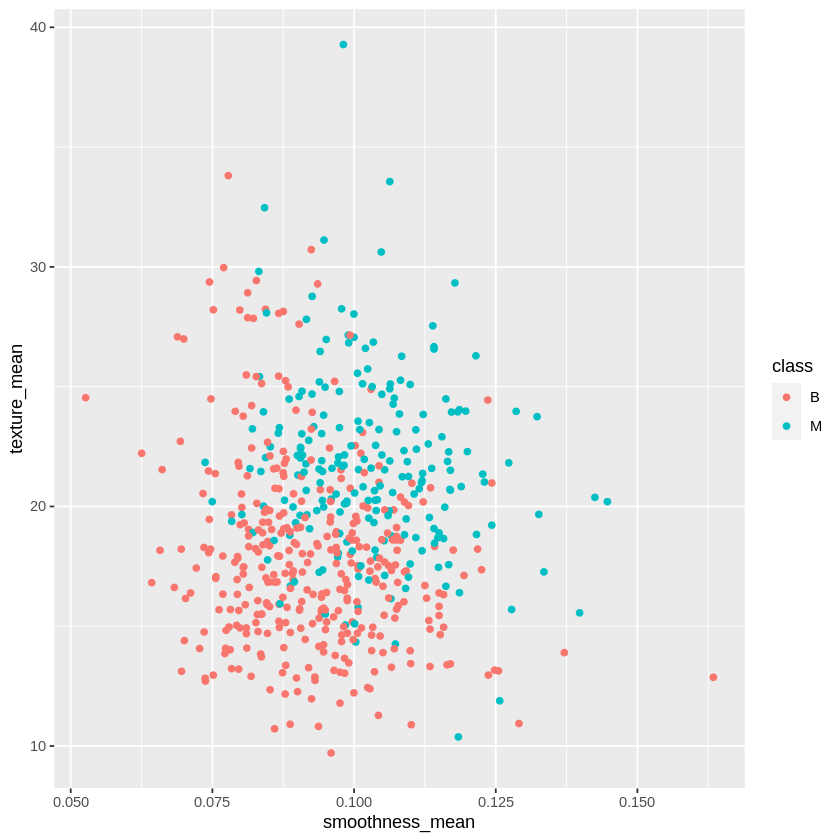

In [9]:
ggplot(df_wdbc, aes(x = smoothness_mean, y = texture_mean, color = class)) + geom_point()

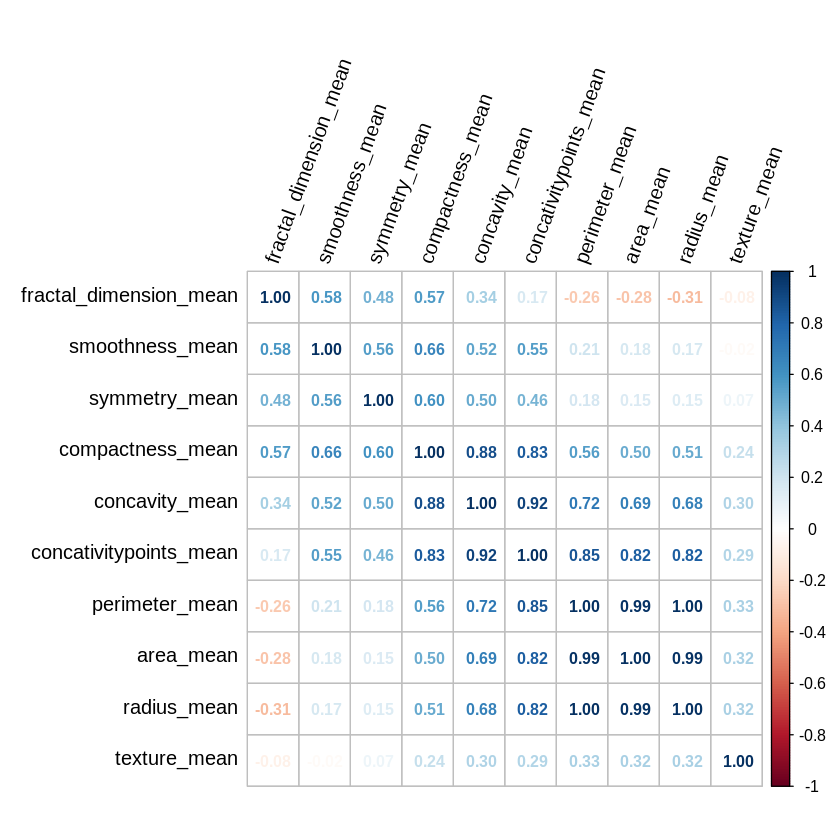

In [10]:
M <- cor(df_wdbc[2:11])

corrplot(M, method="number", tl.col="black", addCoef.col="grey", order = "AOE", number.cex= 0.80, tl.cex = 1, tl.srt=70)

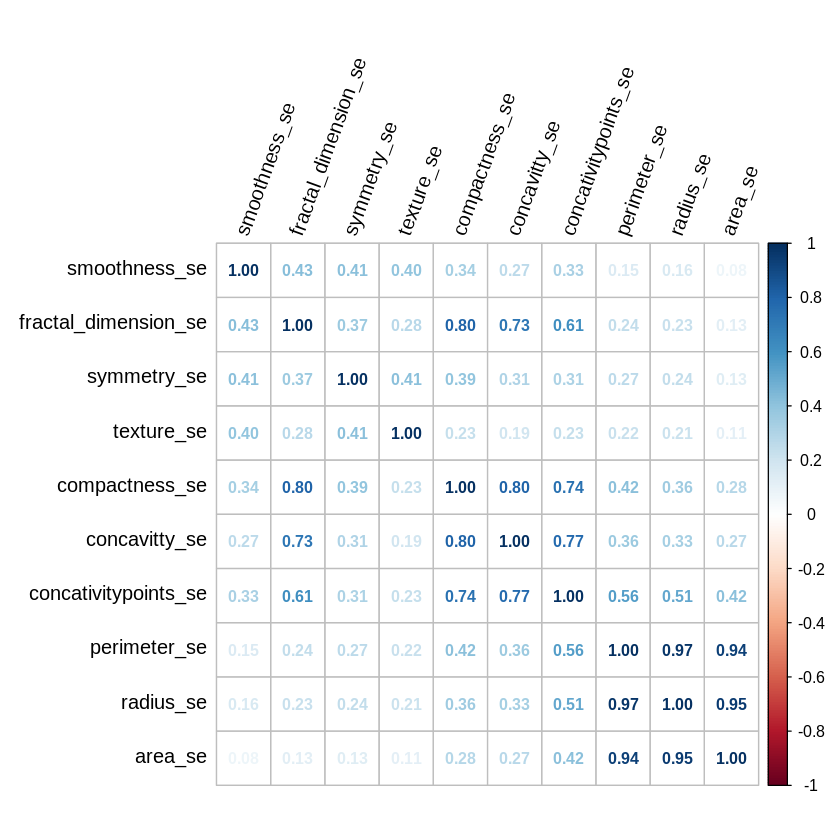

In [11]:
M <- cor(df_wdbc[12:21])

corrplot(M, method="number", tl.col="black", addCoef.col="grey", order = "AOE", 
        number.cex= 0.80, tl.cex = 1, tl.srt=70)

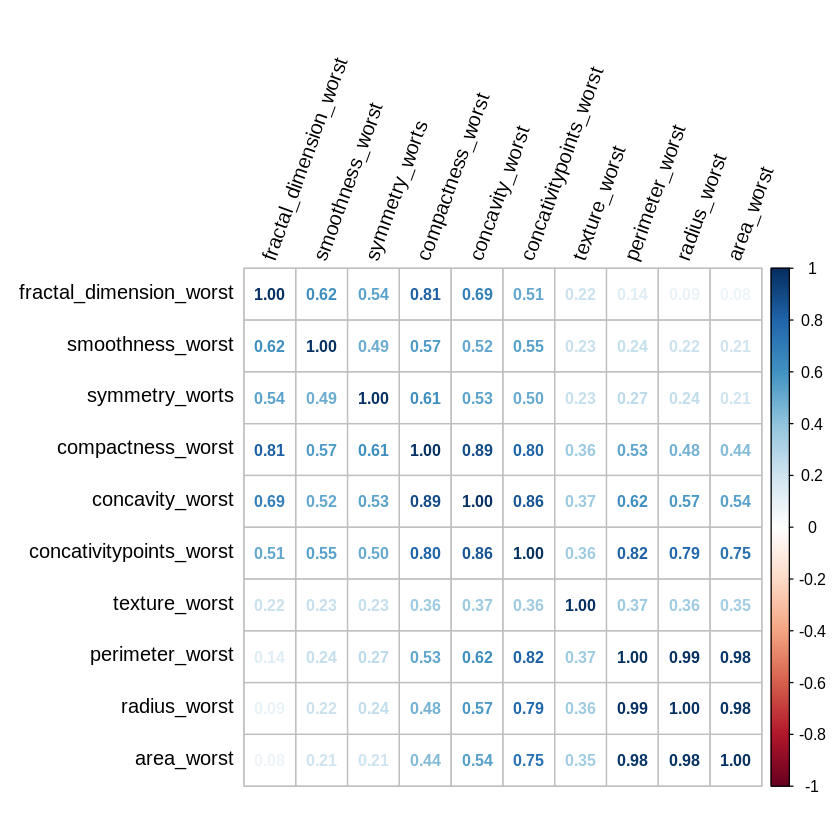

In [12]:
M <- cor(df_wdbc[22:31])

corrplot(M, method="number", tl.col="black", addCoef.col="grey", order = "AOE", 
          number.cex= 0.80, tl.cex = 1, tl.srt=70)

## Aplicación de modelos supervisados y no supervisadoss

### Regresión Logística

In [13]:
#randomly order the rows
set.seed(123456)
data_random <- df_wdbc %>%
sample_frac(size = 1, replace = FALSE)

#split data 
train_data <- data_random %>%
  slice(1:400)
test_data <- data_random %>%
slice(401:569)

In [14]:
#build logistic regression
model_glm <- glm(class ~., data = train_data, family = "binomial")
summary(model_glm)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = class ~ ., family = "binomial", data = train_data)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-1.577e-04  -2.100e-08  -2.100e-08   2.100e-08   1.865e-04  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)
(Intercept)              5.481e+02  5.431e+05   0.001    0.999
radius_mean             -4.304e+02  1.693e+05  -0.003    0.998
texture_mean             1.032e+01  5.192e+03   0.002    0.998
perimeter_mean           4.421e+01  2.126e+04   0.002    0.998
area_mean                3.632e-01  8.710e+02   0.000    1.000
smoothness_mean          4.043e+03  3.038e+06   0.001    0.999
compactness_mean        -2.424e+03  8.605e+05  -0.003    0.998
concavity_mean           4.857e+02  1.357e+06   0.000    1.000
concativitypoints_mean   5.255e+03  1.735e+06   0.003    0.998
symmetry_mean           -1.665e+03  4.231e+05  -0.004    0.997
fractal_dimension_mean  -6.751e+03  3.263e+06  -0.002    0.998
radius_se    

In [15]:
lenPre <- predict(model_glm, test_data)

Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”
Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”


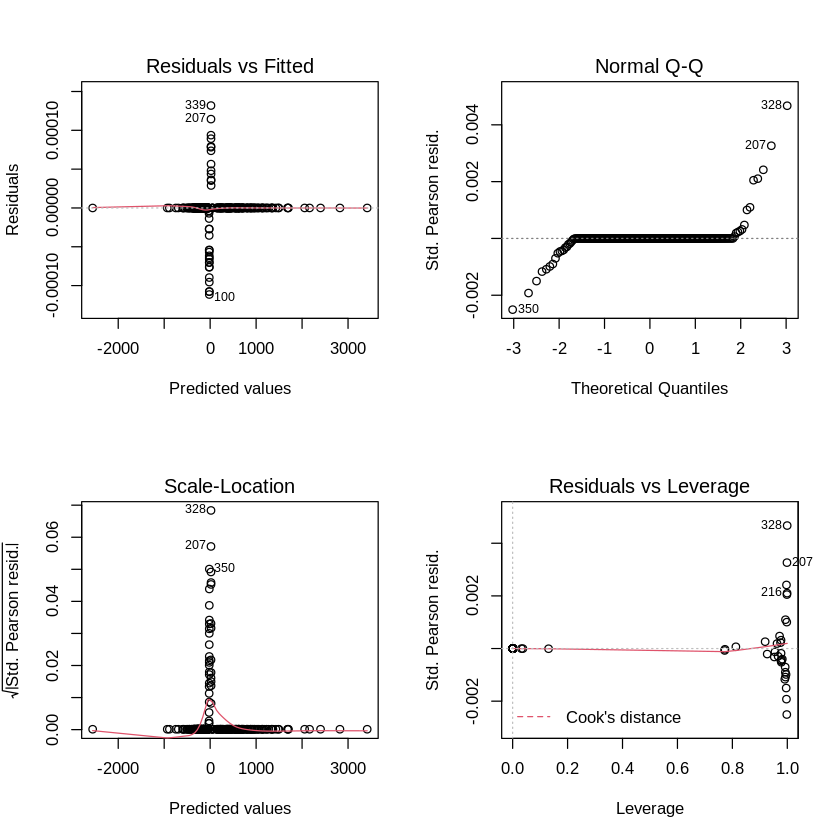

In [16]:
par(mfrow = c(2, 2)) 
plot(model_glm)

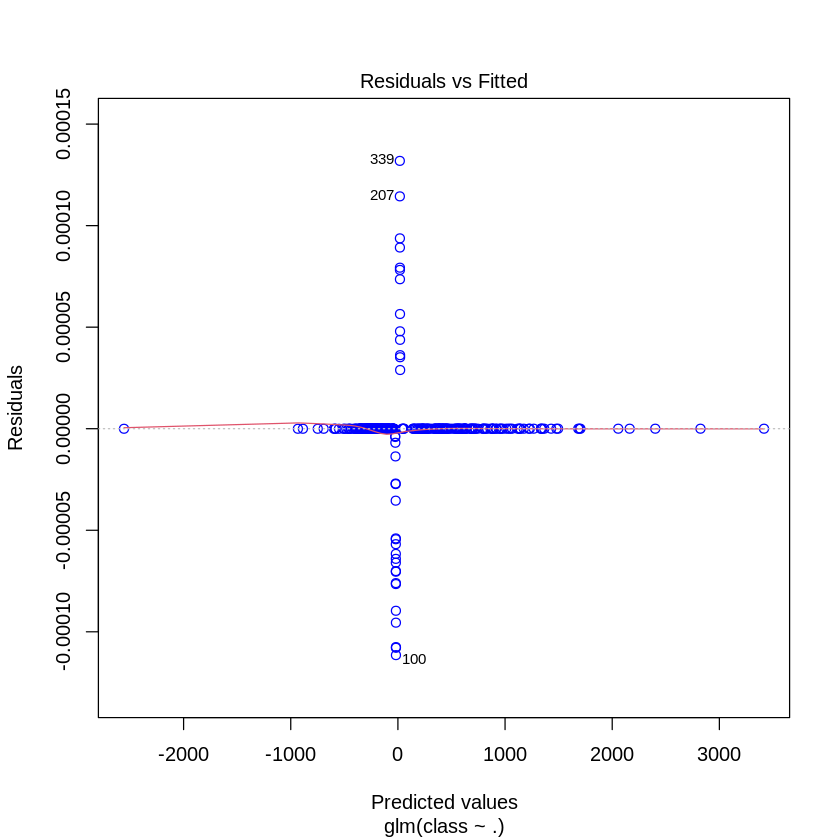

In [17]:
plot(model_glm,which=1, col=c("blue"))

In [18]:
#evaluate model
pred_act <- data.frame(cbind(actual=test_data$class, predicted=lenPre)) 

correlation_accuracy <- cor(pred_act)
correlation_accuracy

actual  predicted
actual    1.00000 0.75674  
predicted 0.75674 1.00000

In [19]:
#see table confidence intervals 
confint(model_glm)

Waiting for profiling to be done...

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted proba

2.5 %         97.5 %      
(Intercept)              -18572.72682  19238.27060
radius_mean               -6205.78903   5107.61296
texture_mean               -179.00973    199.64938
perimeter_mean             -746.27983    845.18559
area_mean                   -26.07235     25.32898
smoothness_mean         -121348.25814 135932.68208
compactness_mean         -32874.10301  28391.81657
concavity_mean           -46684.15071  47655.61006
concativitypoints_mean   -49934.93846  64533.14096
symmetry_mean            -18531.28162  14954.62716
fractal_dimension_mean  -139775.63790 126274.30325
radius_se                -32661.45162  30673.83380
texture_se                -1347.15731   1405.82865
perimeter_se              -3429.84696   3583.67744
area_se                    -185.14158    177.35847
smoothness_se           -670722.18982 674150.48525
compactness_se           -74685.10302  97368.58336
concavitty_se            -75378.84638  57038.79934
concativitypoints_se    -269343.27779 302246.72454
symmetry_se             -121770.23550 116335.04147
fractal_dimension_se    -451234.21362 327988.00283
radius_worst              -3870.98488   4046.89438
texture_worst              -127.98432    143.48687
perimeter_worst            -559.45086    538.55305
area_worst                  -27.01308     29.78381
smoothness_worst         -75038.92602  71069.83734
compactness_worst        -14315.56567  11267.01520
concavity_worst          -11599.01053  13446.03111
concativitypoints_worst  -37259.03147  34123.99262
symmetry_worts           -11715.31039  13848.80263
fractal_dimension_worst  -44577.97496  61857.72103

### Support Vector Machine

In [20]:
#randomly order the rows
set.seed(12345)
allrows <- 1:nrow(df_wdbc)
trainrows <- sample(allrows, replace = FALSE, size = 0.7*length(allrows))
#split traint/test
train_df <- df_wdbc[trainrows, 2:31]  
train_label <- df_wdbc[trainrows, 1]
test_df <- df_wdbc[-trainrows, 2:31] 
test_label <- df_wdbc[-trainrows, 1]

In [21]:
TrainCtrl <- trainControl(method = "cv", number = 5,verbose = FALSE)
grid <- expand.grid(C = c(0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5))
svm_linear <- train(class ~., 
                    data = train_data, 
                    method = "svmLinear",
                    trControl=TrainCtrl, 
                    tuneGrid = grid, 
                    tuneLength = 10)
svm_linear

Support Vector Machines with Linear Kernel 

400 samples
 30 predictor
  2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 319, 320, 320, 321, 320 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.01  0.9674676  0.9297419
  0.05  0.9674984  0.9303470
  0.10  0.9649351  0.9245377
  0.25  0.9649351  0.9244759
  0.50  0.9599660  0.9139770
  0.75  0.9624660  0.9191115
  1.00  0.9624660  0.9191115
  1.25  0.9674351  0.9299657
  1.50  0.9599344  0.9142024

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was C = 0.05.

In [22]:
test_pred <- predict(svm_linear, newdata = test_data)
test_pred

[1] B M B B B M M B B B M M M B B B B B B B B M B B M M M B B B B B B B M B M
 [38] B B M B B B B B M B B M B M M B M B B B B M B B B B M M B B B B B B B M M
 [75] M B M B M B B B B B B M M B M B B B M B B B B B B B M B B B B B B B B B B
[112] M M M M M B B B M M B B M B B M M B M M B B M M B B M B B B M B M B B B M
[149] M M M M B M B B B B B B B B B B M B B B M
Levels: B M

In [23]:
confusionMatrix(test_pred, test_data$class)

Confusion Matrix and Statistics

          Reference
Prediction   B   M
         B 109   4
         M   0  56
                                          
               Accuracy : 0.9763          
                 95% CI : (0.9405, 0.9935)
    No Information Rate : 0.645           
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9475          
                                          
 Mcnemar's Test P-Value : 0.1336          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9333          
         Pos Pred Value : 0.9646          
         Neg Pred Value : 1.0000          
             Prevalence : 0.6450          
         Detection Rate : 0.6450          
   Detection Prevalence : 0.6686          
      Balanced Accuracy : 0.9667          
                                          
       'Positive' Class : B               
                              

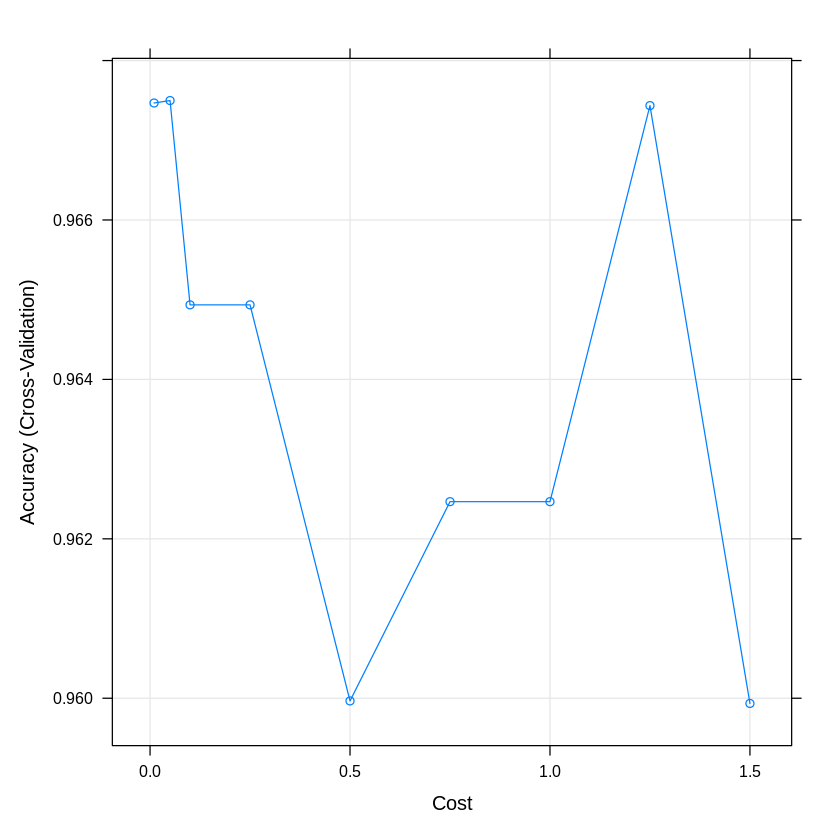

In [24]:
plot(svm_linear)

### Naive Bayes

In [25]:
install.packages("naivebayes") 
library(naivebayes)
naive_fit <- naive_bayes(class ~., data = train_data)
naive_fit

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

naivebayes 0.9.7 loaded




================================== Naive Bayes ================================== 
 
 Call: 
naive_bayes.formula(formula = class ~ ., data = train_data)

--------------------------------------------------------------------------------- 
 
Laplace smoothing: 0

--------------------------------------------------------------------------------- 
 
 A priori probabilities: 

   B    M 
0.62 0.38 

--------------------------------------------------------------------------------- 
 
 Tables: 

--------------------------------------------------------------------------------- 
 ::: radius_mean (Gaussian) 
--------------------------------------------------------------------------------- 
           
radius_mean         B         M
       mean 12.127448 17.475658
       sd    1.707501  3.142861

--------------------------------------------------------------------------------- 
 ::: texture_mean (Gaussian) 
--------------------------------------------------------------------------------- 
       

In [26]:
#predict the species based on the new data.
test_data$pred <- predict(naive_fit, newdata = select(test_data,-class)) 
#get confusion matrix
tab_cm <- table(test_data$pred, test_data$class)
tab_cm

   
      B   M
  B 102   5
  M   7  55

In [27]:
mean(test_data$class == test_data$pred)

[1] 0.9289941

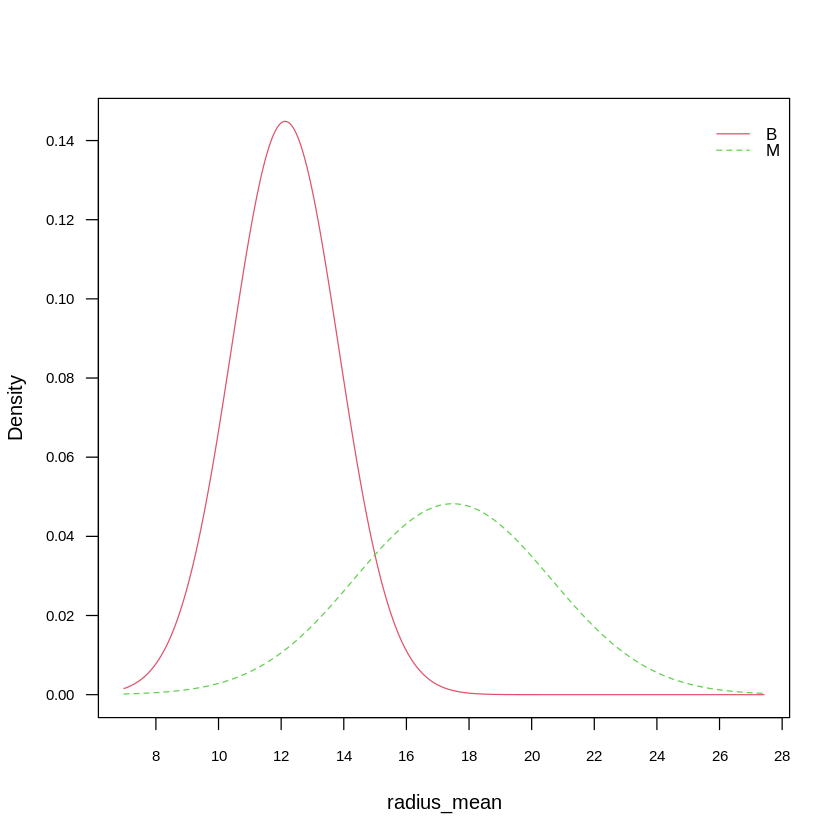

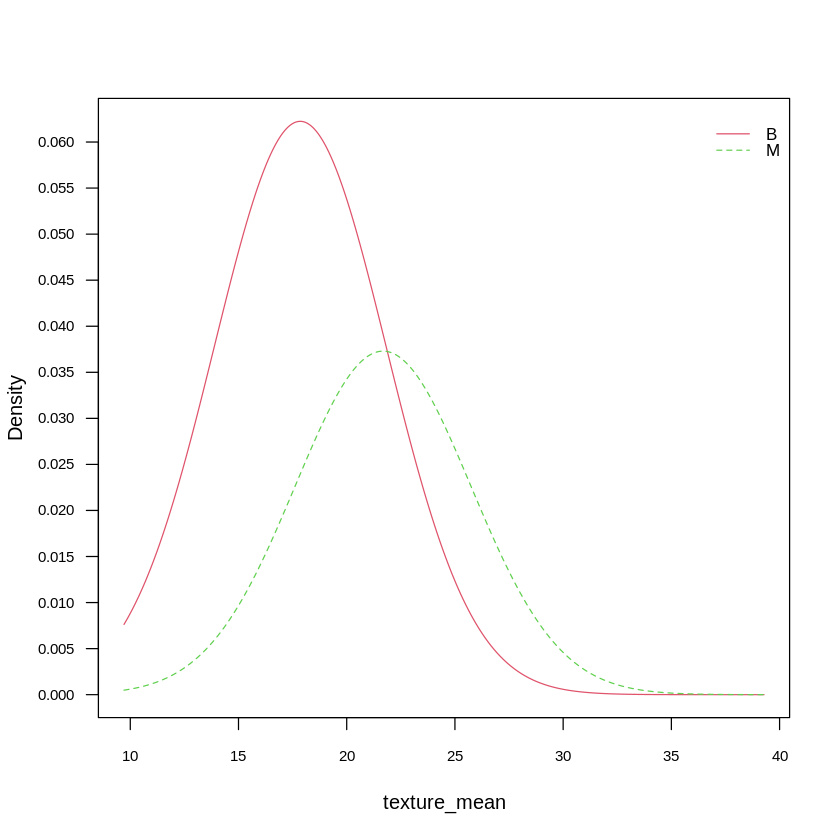

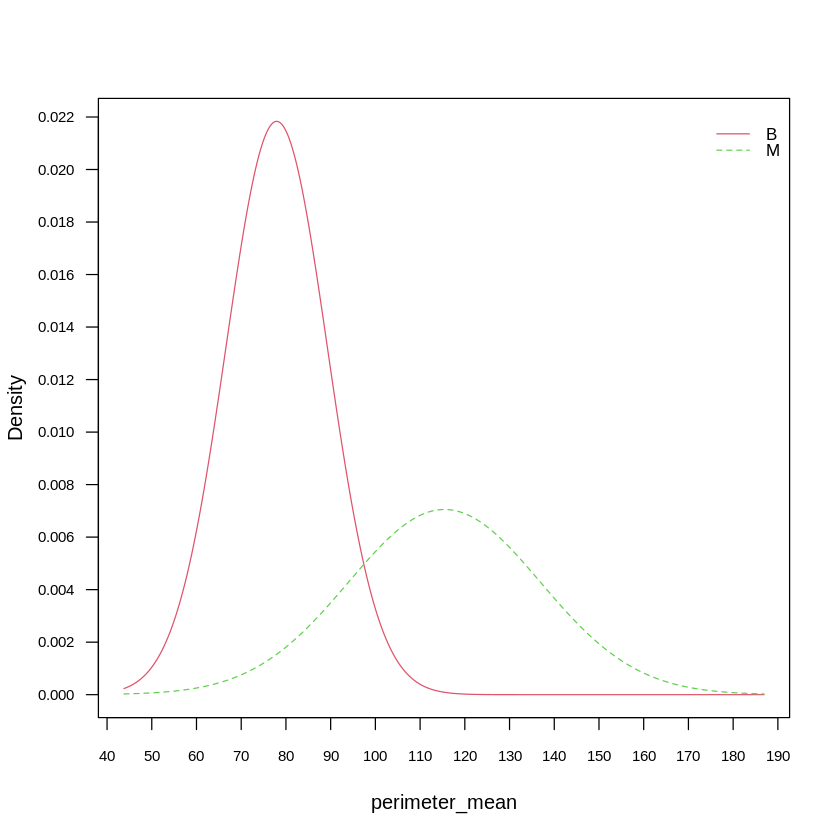

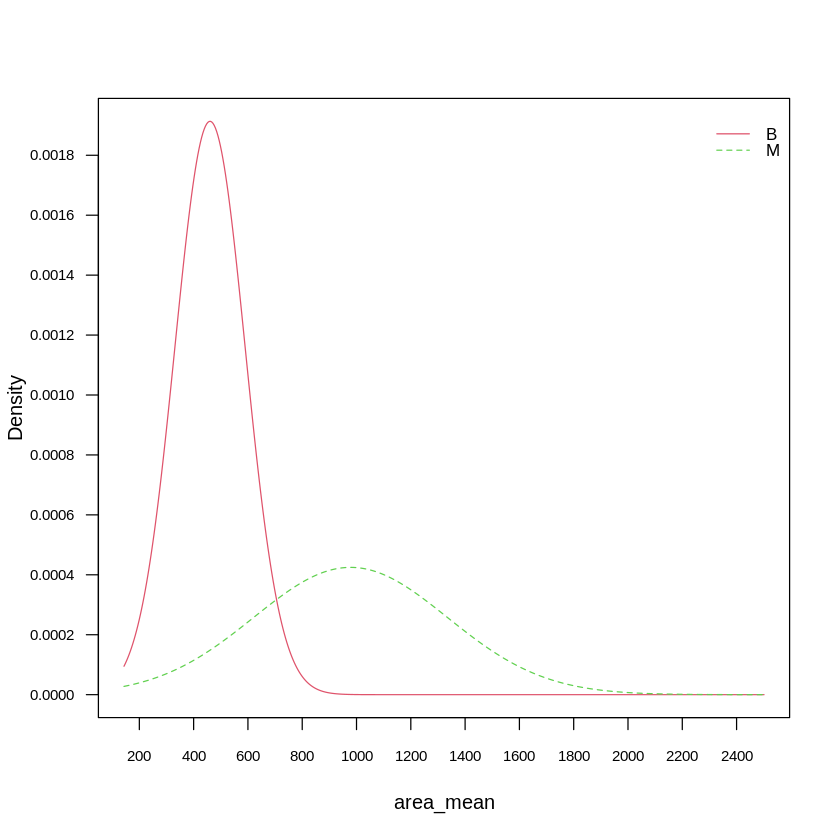

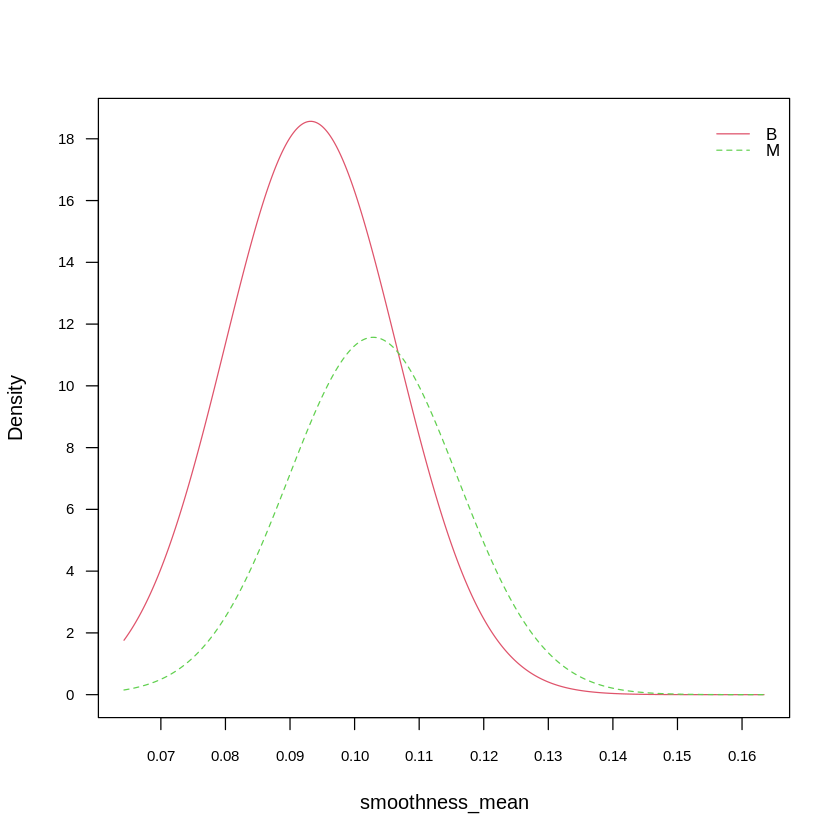

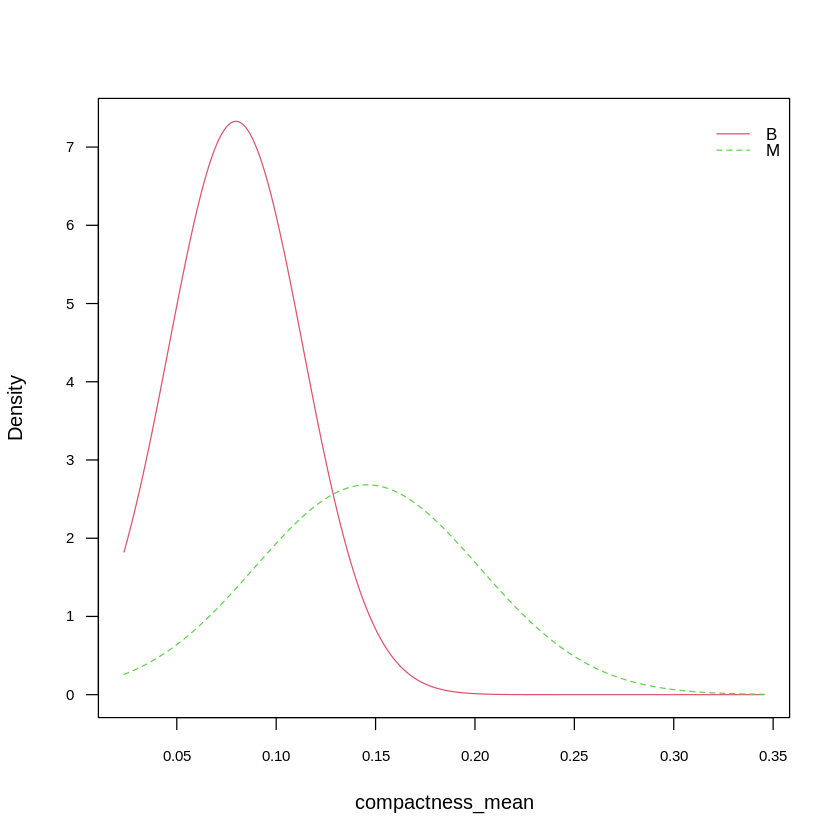

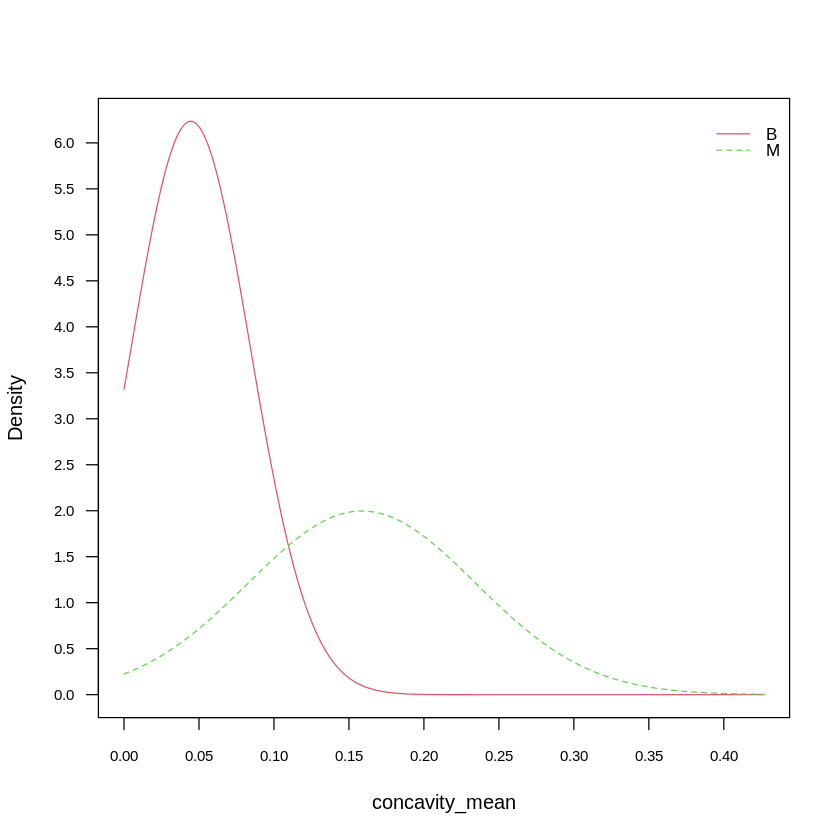

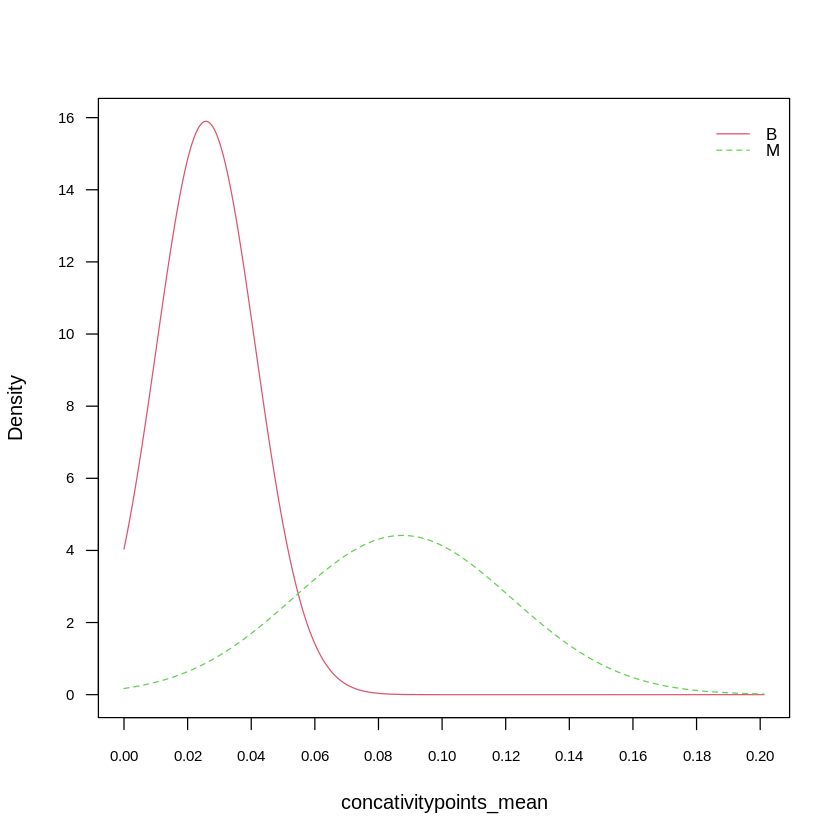

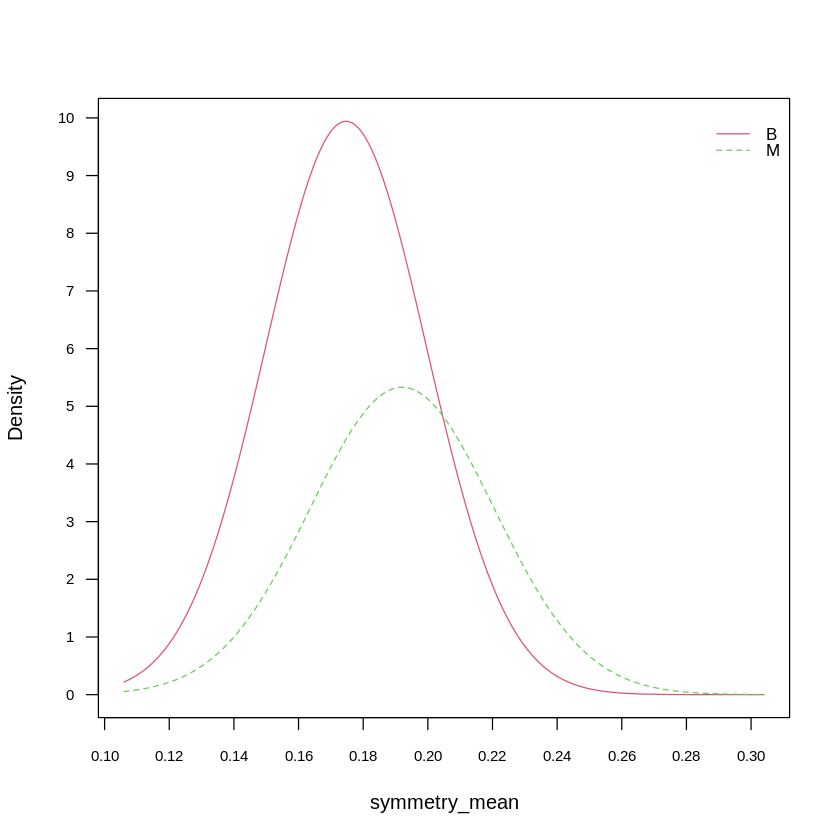

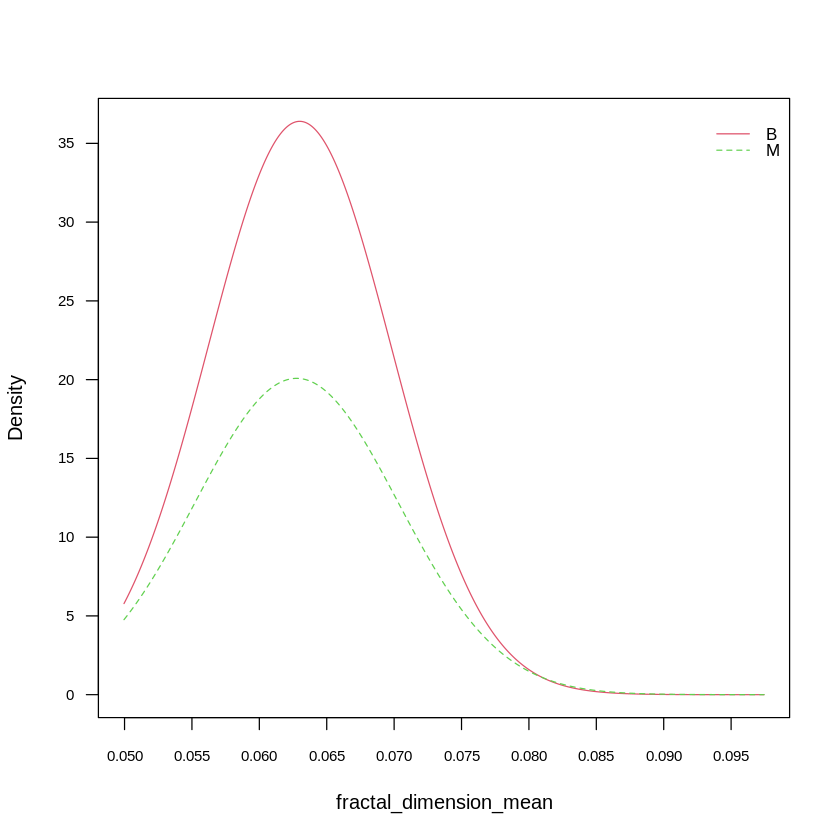

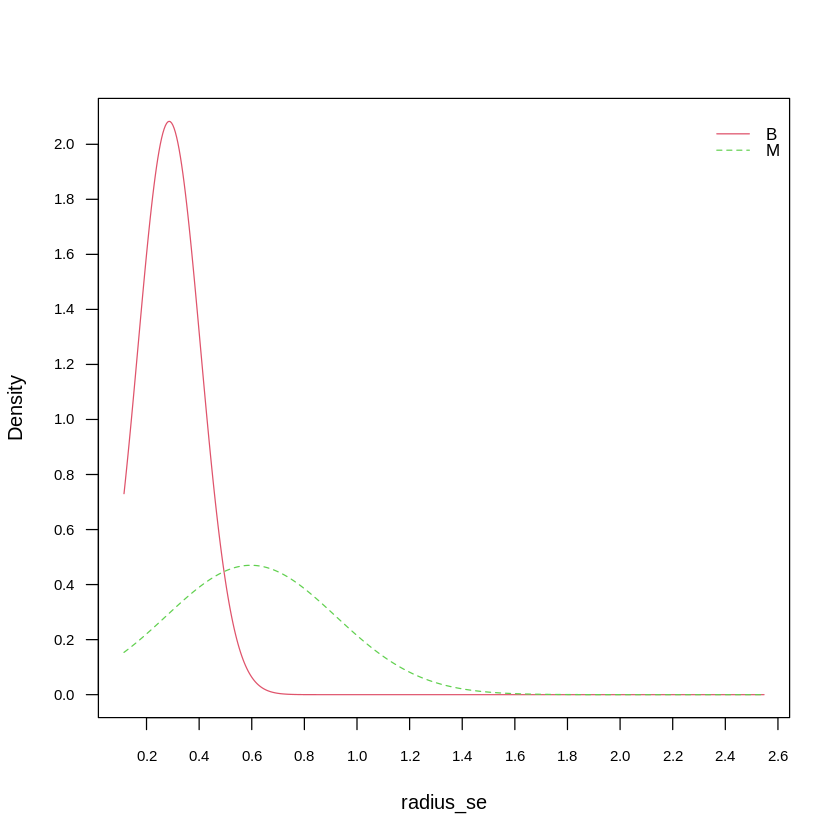

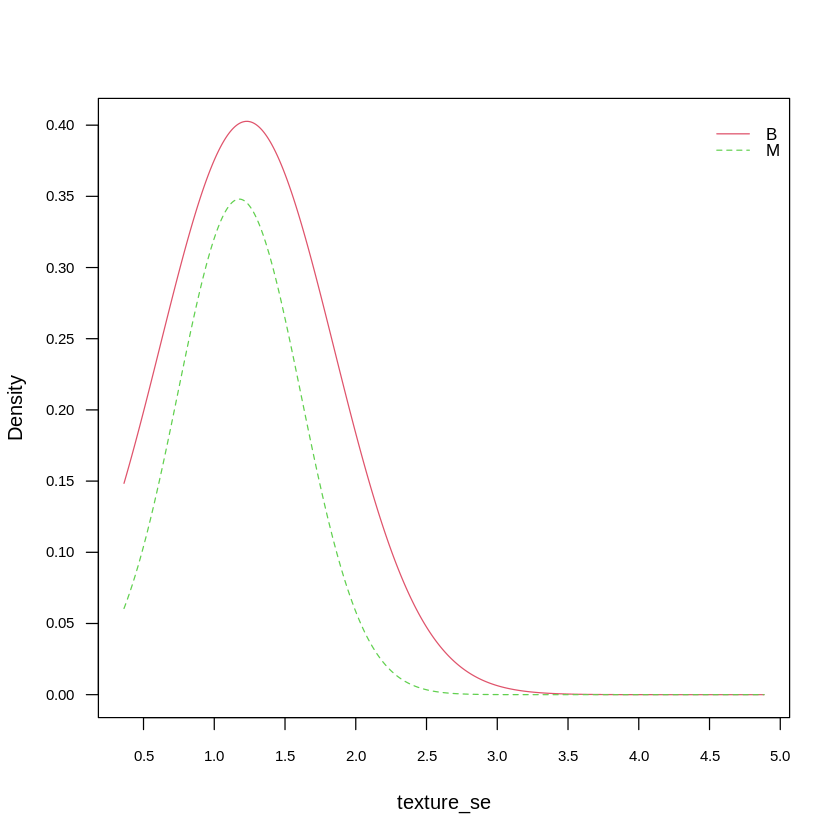

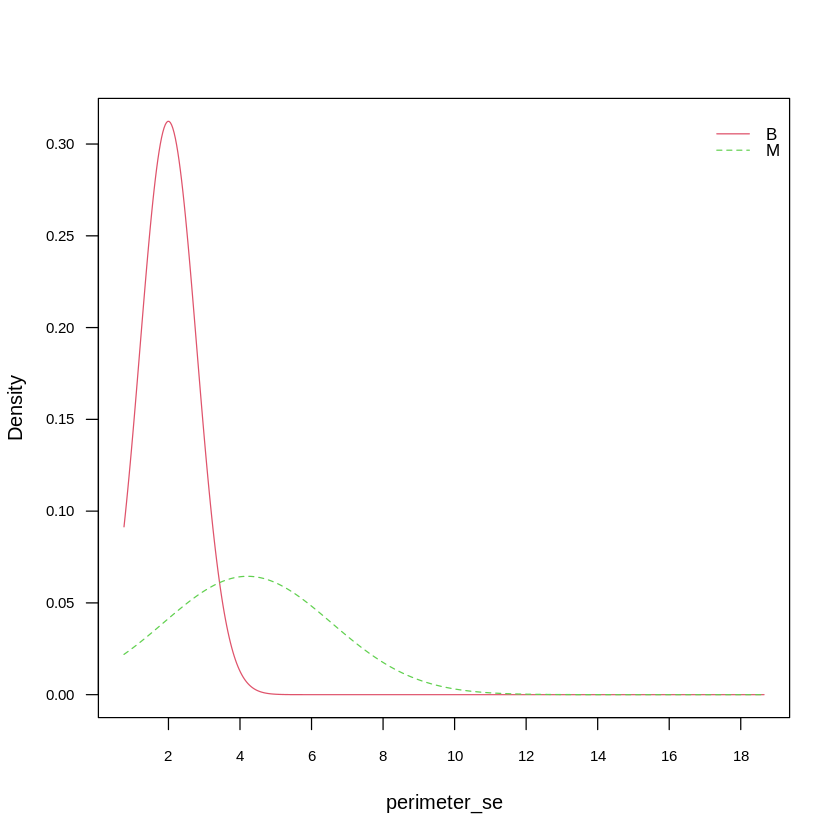

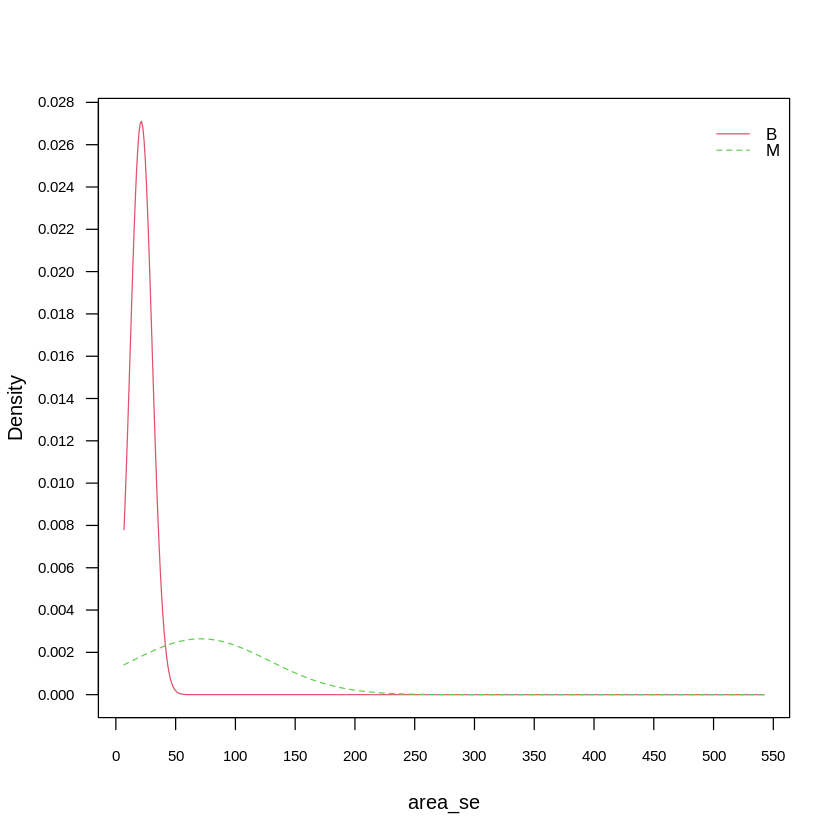

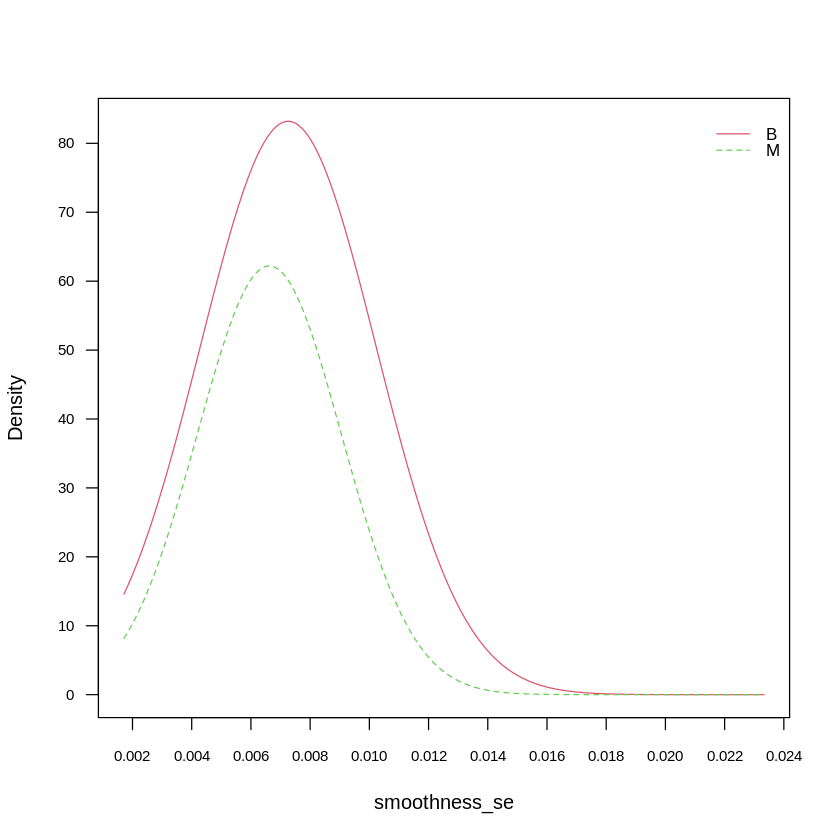

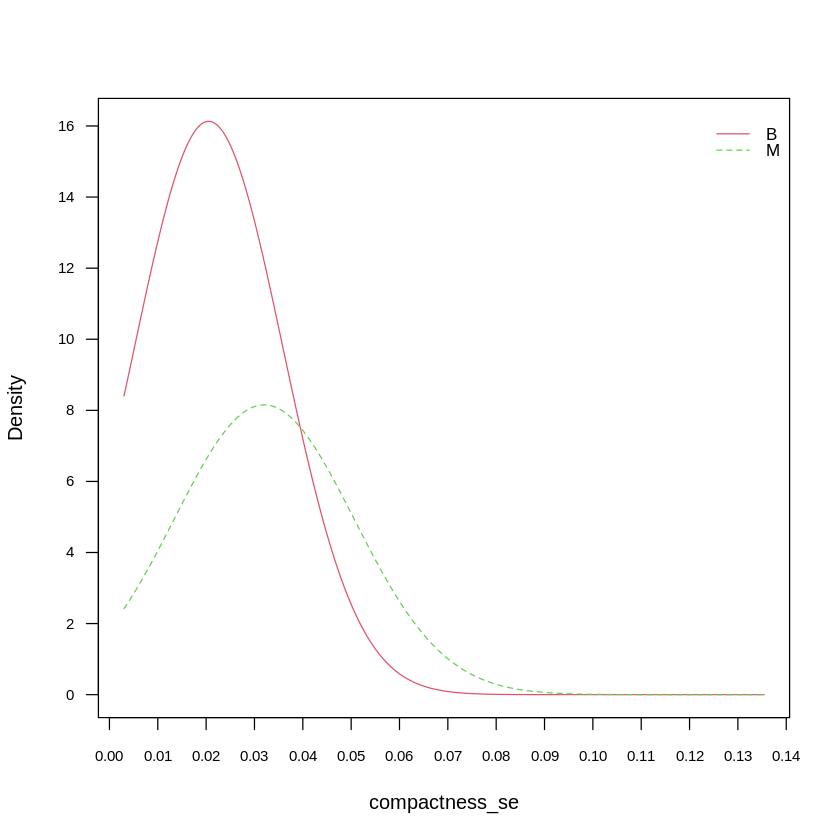

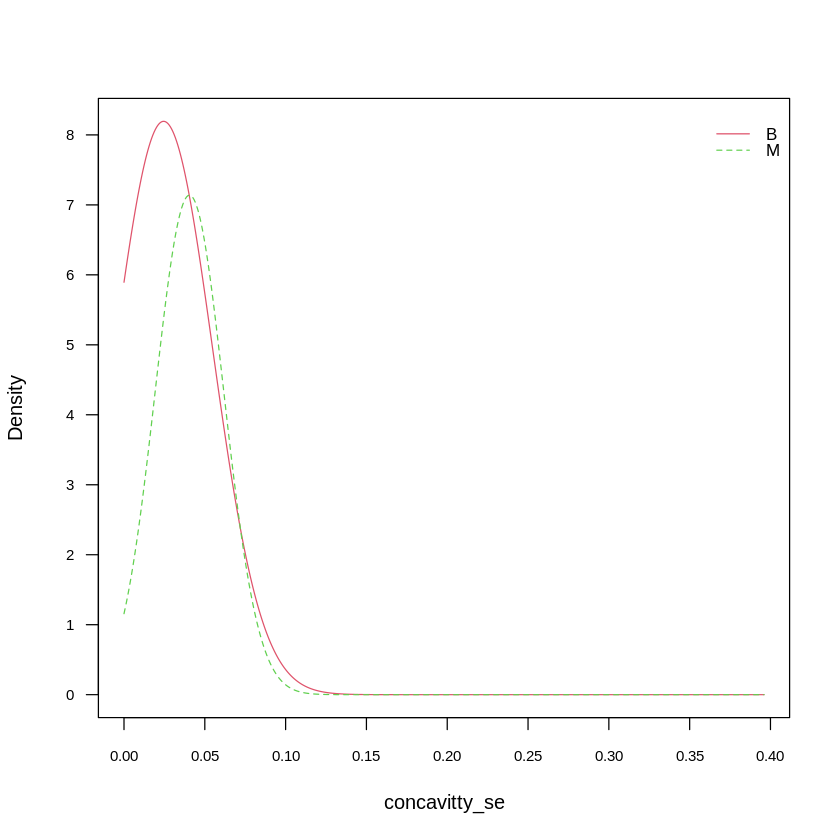

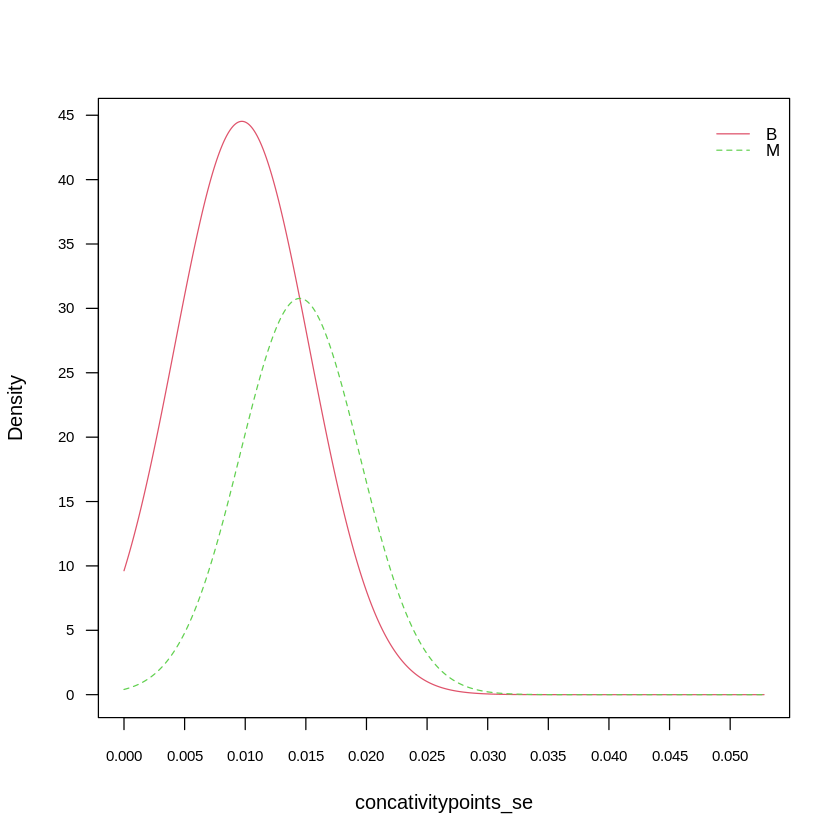

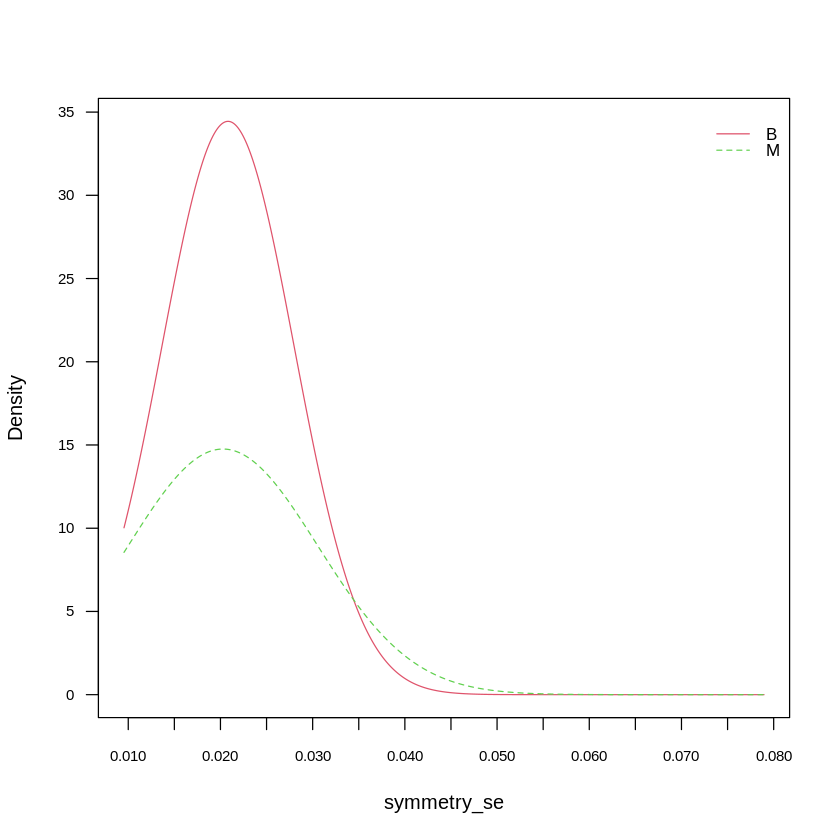

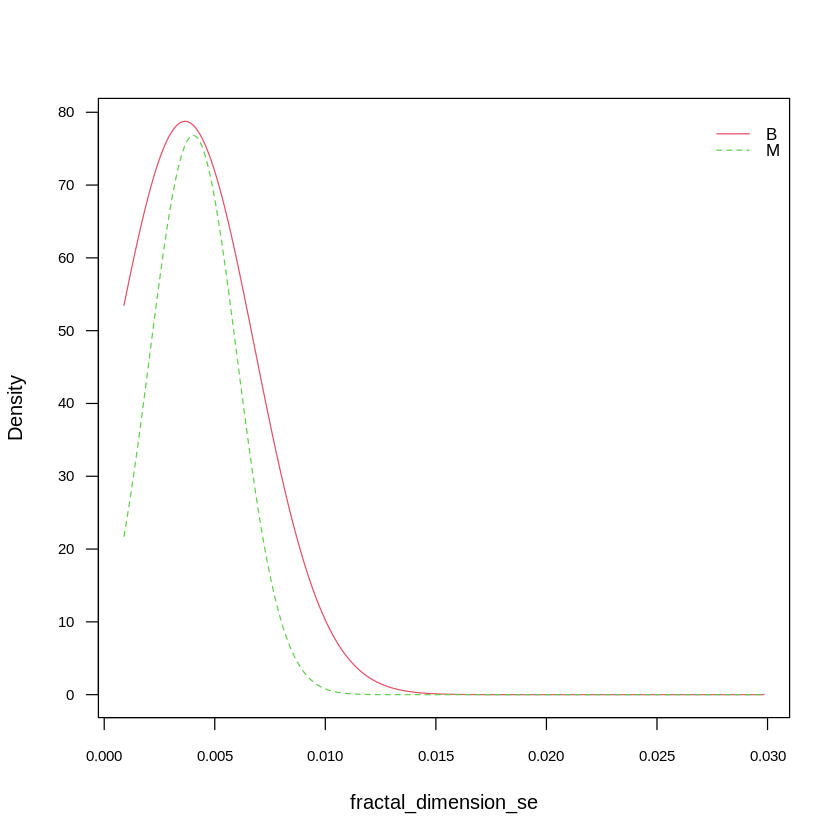

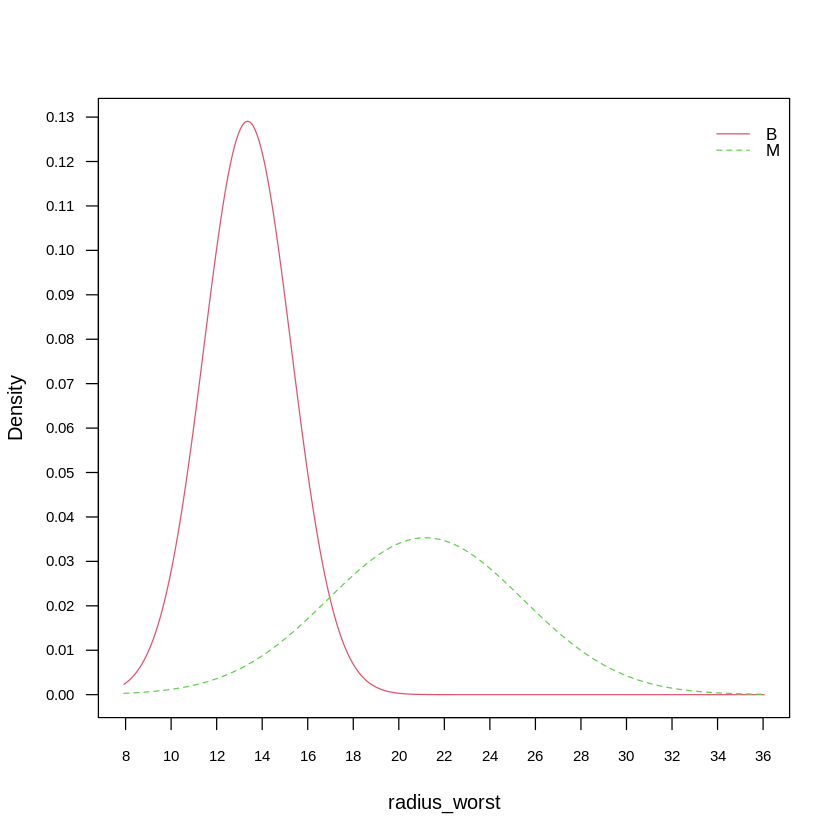

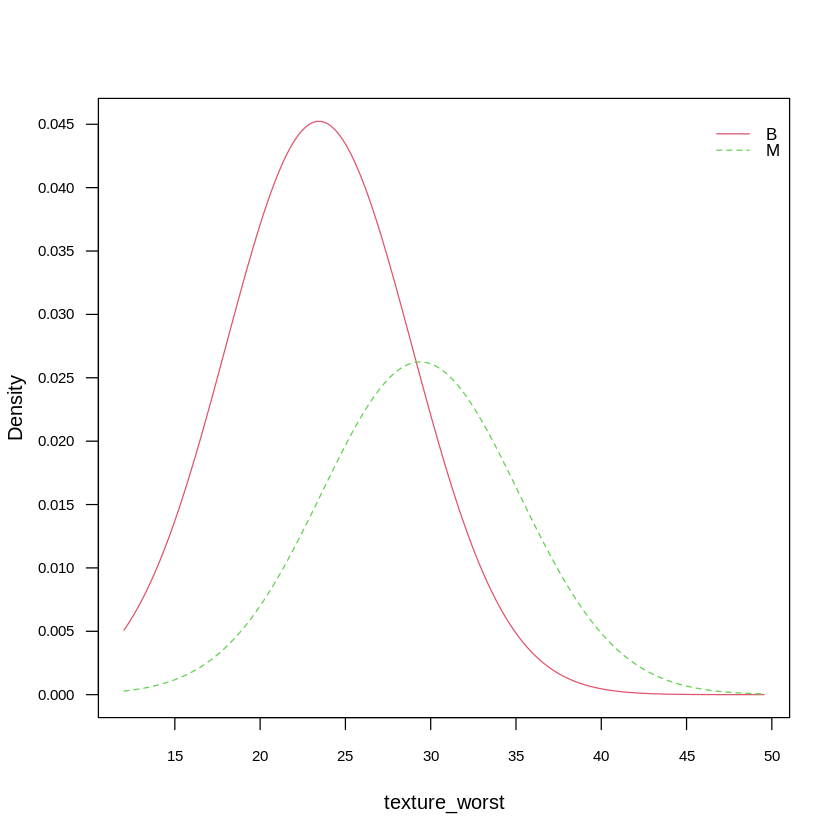

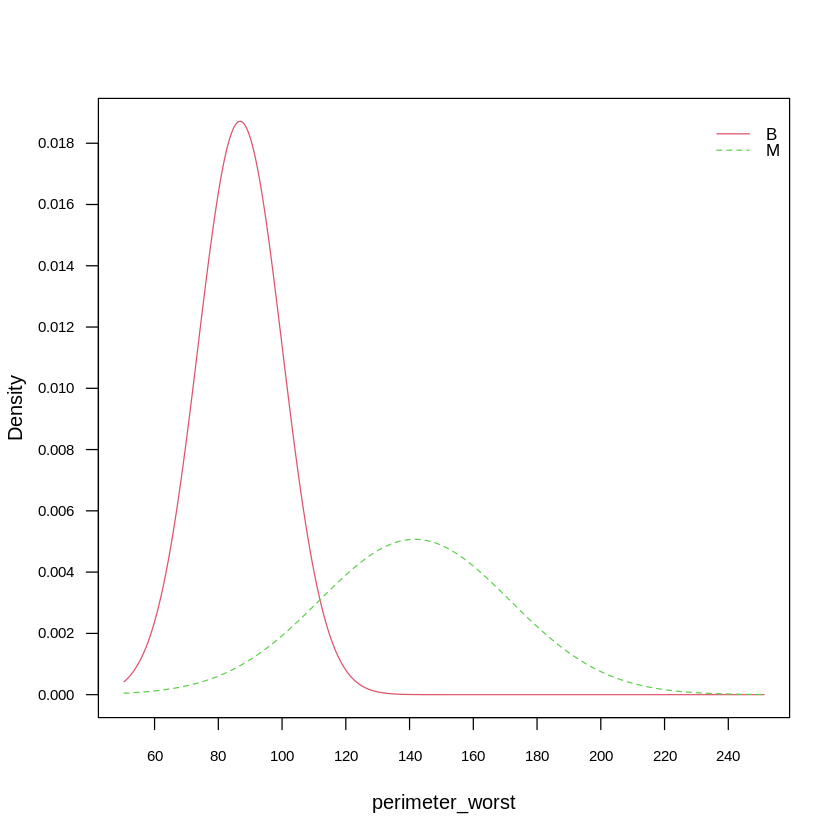

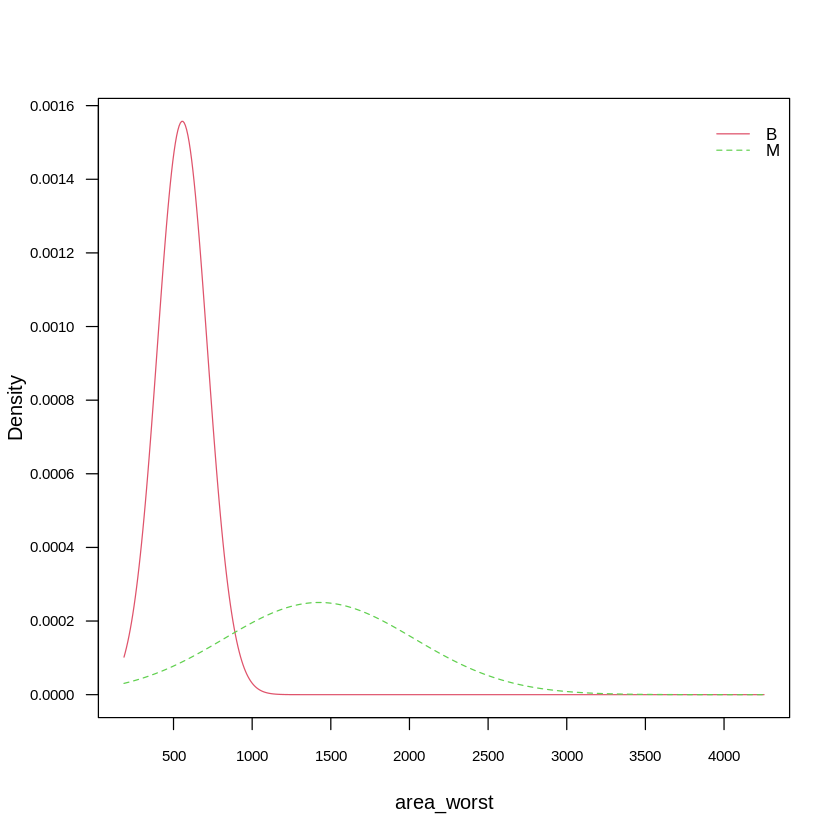

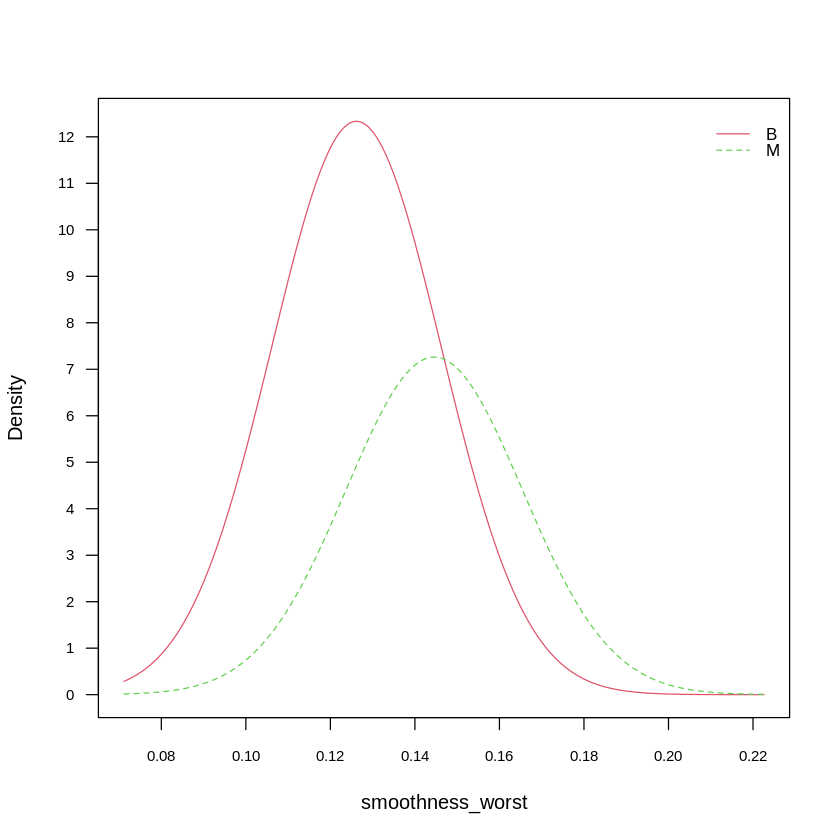

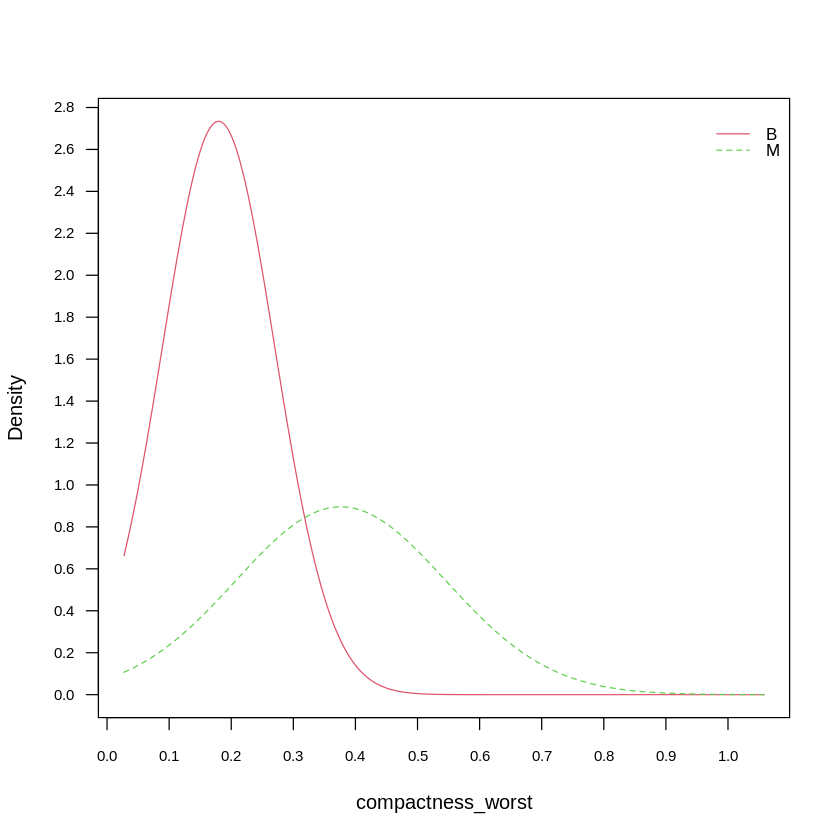

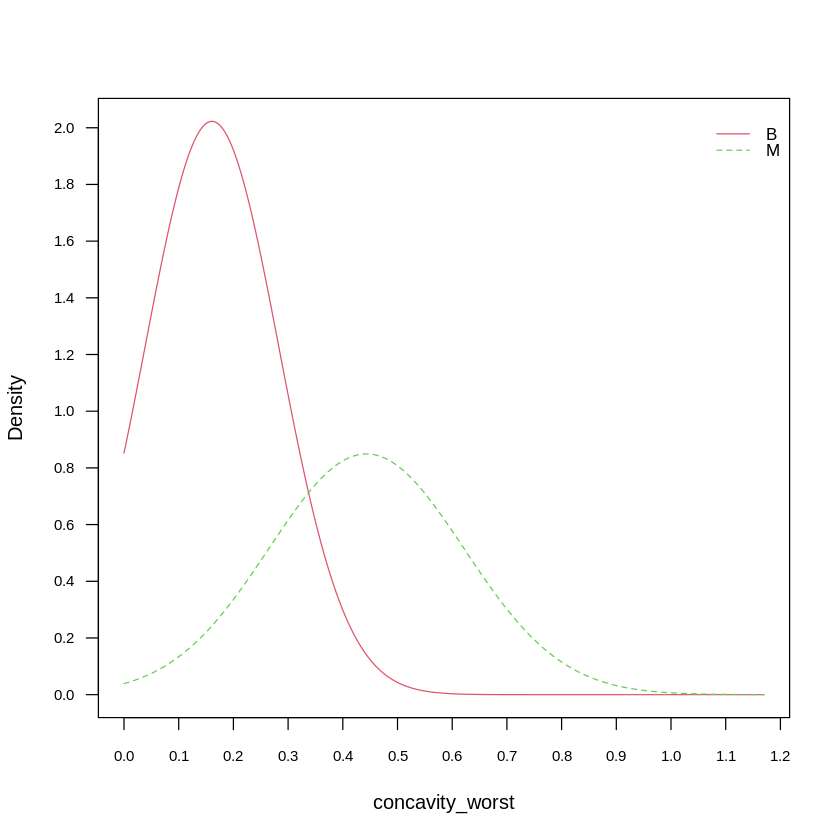

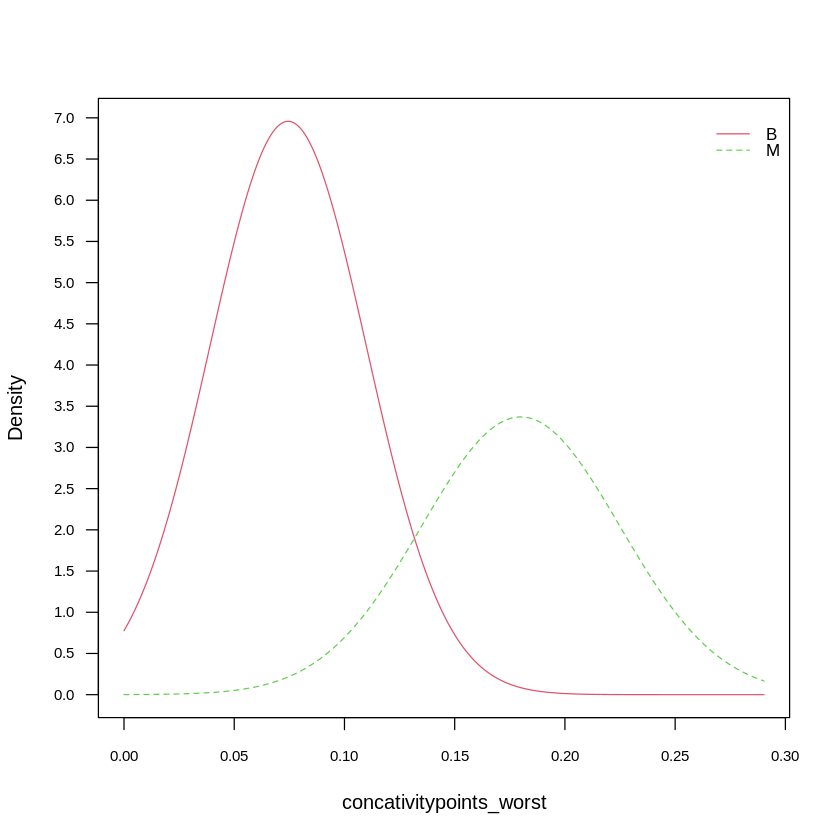

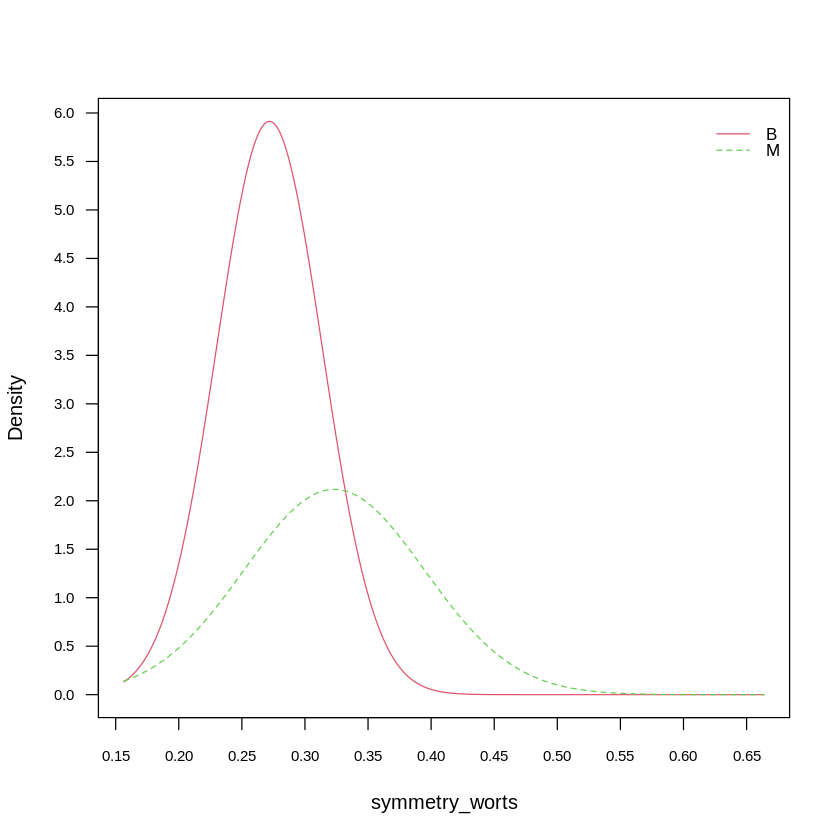

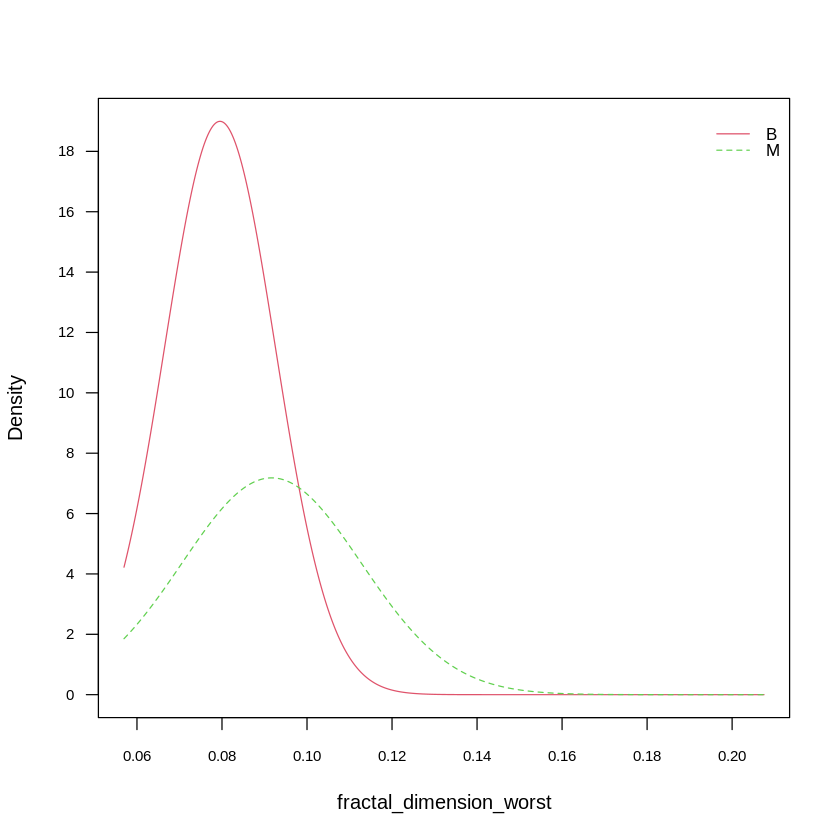

In [28]:
plot(naive_fit)

### K-Nearest Neighbors

In [29]:
knn_fit <- train(class ~., data = train_data, method = 'knn', trControl = TrainCtrl)
knn_fit

k-Nearest Neighbors 

400 samples
 30 predictor
  2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 320, 321, 319, 319, 321 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.9400231  0.8715667
  7  0.9350539  0.8599914
  9  0.9350547  0.8598821

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 5.

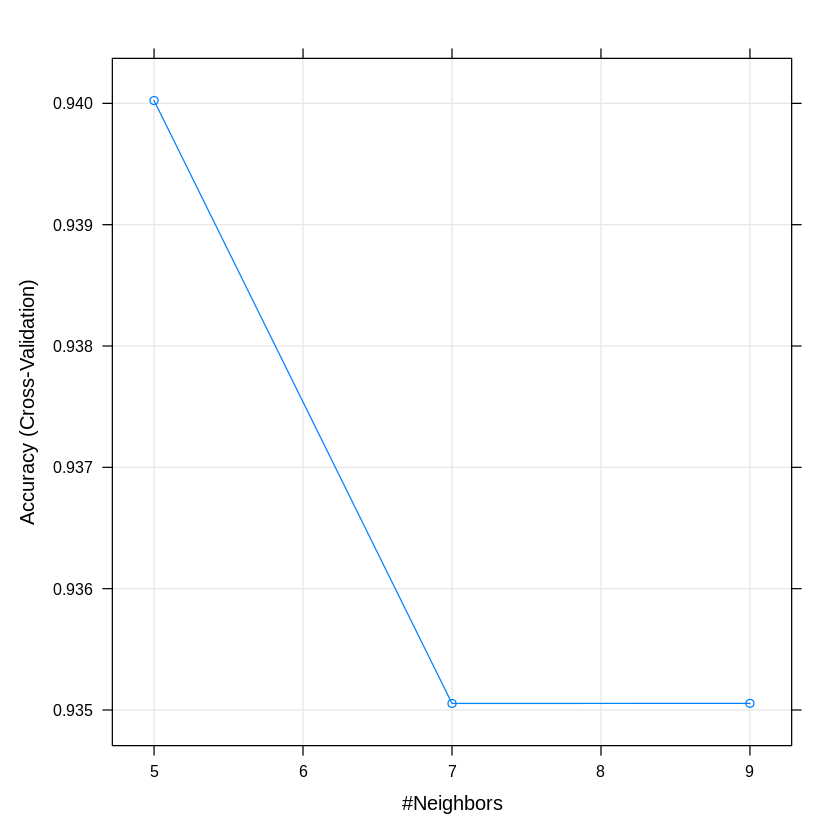

In [30]:
plot(knn_fit)

In [31]:
pred_knn <- predict(knn_fit, newdata = test_data)
pred_knn

[1] B M B M B M M B B B B M M B B B B B B B B M B B M M M B B B B B B B M B M
 [38] B B B B B B B B M B B M B M M B B B B M M M B B B B M M B B B B B B B M M
 [75] B B B B M B B B B B B M M B M B M B M B B B B B B B M B B B B B B B B B B
[112] M B M M M B M B M M B B M B B M M B M M B B M M B M M B B B M B M B B B M
[149] M M B B B M B B B B B B B B B B M B B B M
Levels: B M

In [32]:
confusionMatrix(pred_knn, test_data$class)

Confusion Matrix and Statistics

          Reference
Prediction   B   M
         B 104  11
         M   5  49
                                          
               Accuracy : 0.9053          
                 95% CI : (0.8508, 0.9449)
    No Information Rate : 0.645           
    P-Value [Acc > NIR] : 5.76e-15        
                                          
                  Kappa : 0.7885          
                                          
 Mcnemar's Test P-Value : 0.2113          
                                          
            Sensitivity : 0.9541          
            Specificity : 0.8167          
         Pos Pred Value : 0.9043          
         Neg Pred Value : 0.9074          
             Prevalence : 0.6450          
         Detection Rate : 0.6154          
   Detection Prevalence : 0.6805          
      Balanced Accuracy : 0.8854          
                                          
       'Positive' Class : B               
                              

In [33]:
mean(pred_knn == test_data$class)

[1] 0.9053254

### K-means

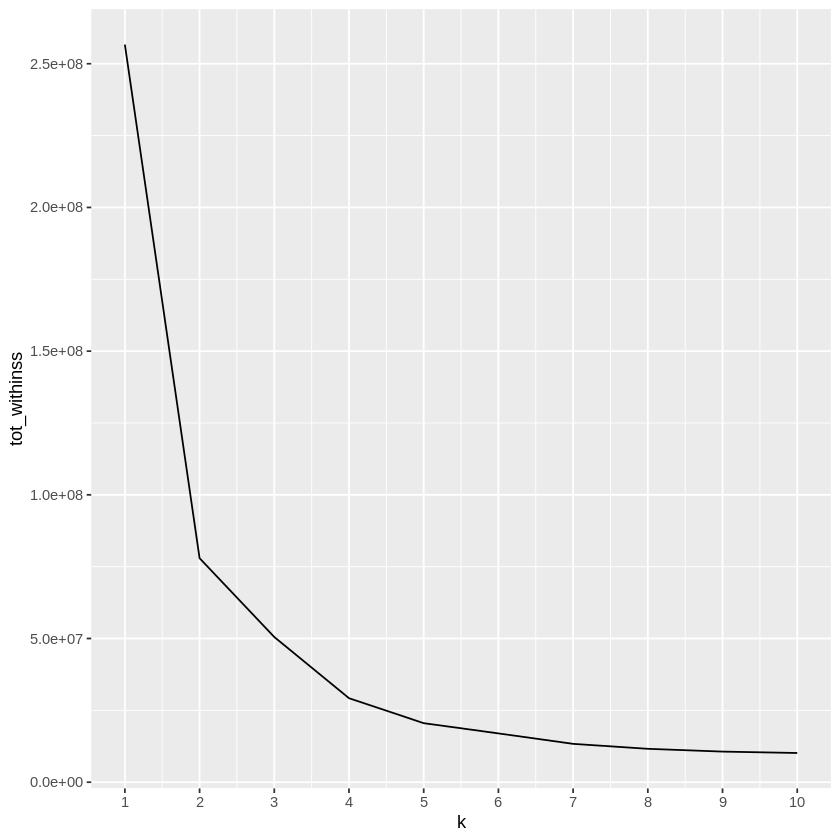

In [34]:
#build k means model 
library(cluster)
tot_withinss <- map_dbl(1:10, function(k){ 
  model_kmeans <- kmeans(x = df_wdbc[,2:31], centers = k) 
  model_kmeans$tot.withinss
})

elbow_df <- data.frame(
  k = 1:10,
  tot_withinss = tot_withinss
)

ggplot(elbow_df, aes(x = k, y = tot_withinss)) + 
geom_line() +
scale_x_continuous(breaks = 1:10)

In [35]:
kmeans_model <- kmeans(df_wdbc[,2:31], centers = 2, nstart = 5)
kmeans_model

K-means clustering with 2 clusters of sizes 131, 438

Cluster means:
  radius_mean texture_mean perimeter_mean area_mean smoothness_mean
1    19.37992     21.69458      128.23130 1185.9298       0.1012946
2    12.55630     18.57037       81.12347  496.0619       0.0948845
  compactness_mean concavity_mean concativitypoints_mean symmetry_mean
1       0.14861298     0.17693947             0.10069878     0.1915397
2       0.09109982     0.06243776             0.03343254     0.1780580
  fractal_dimension_mean radius_se texture_se perimeter_se  area_se
1             0.06060290 0.7428038   1.222538     5.250580 95.67817
2             0.06345402 0.3041909   1.215153     2.152881 23.78529
  smoothness_se compactness_se concavitty_se concativitypoints_se symmetry_se
1   0.006598687     0.03217669    0.04241977           0.01567398  0.02030397
2   0.007173263     0.02347469    0.02874551           0.01063632  0.02061358
  fractal_dimension_se radius_worst texture_worst perimeter_worst area_worst

In [36]:
#extract cluster assignment vector
cluster_2 <- kmeans_model$cluster
df_km2 <- mutate(df_wdbc, cluster = cluster_2) 

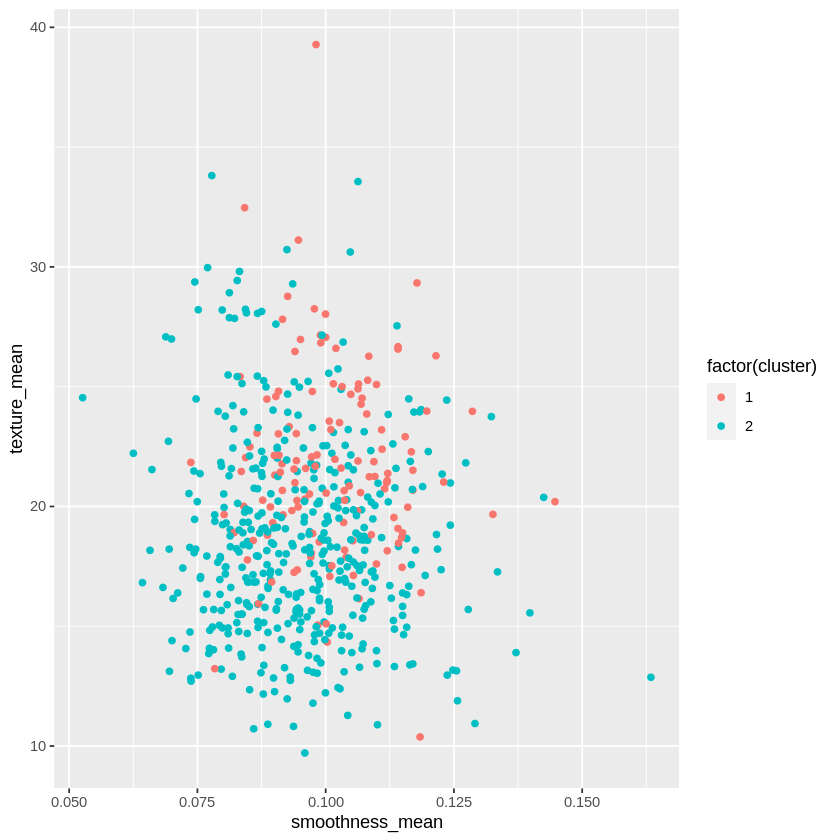

In [37]:
ggplot(df_km2, aes(x = smoothness_mean, y = texture_mean, color = factor(cluster))) +
geom_point()

In [38]:
table(cluster_2, df_wdbc$class)

         
cluster_2   B   M
        1   1 130
        2 356  82

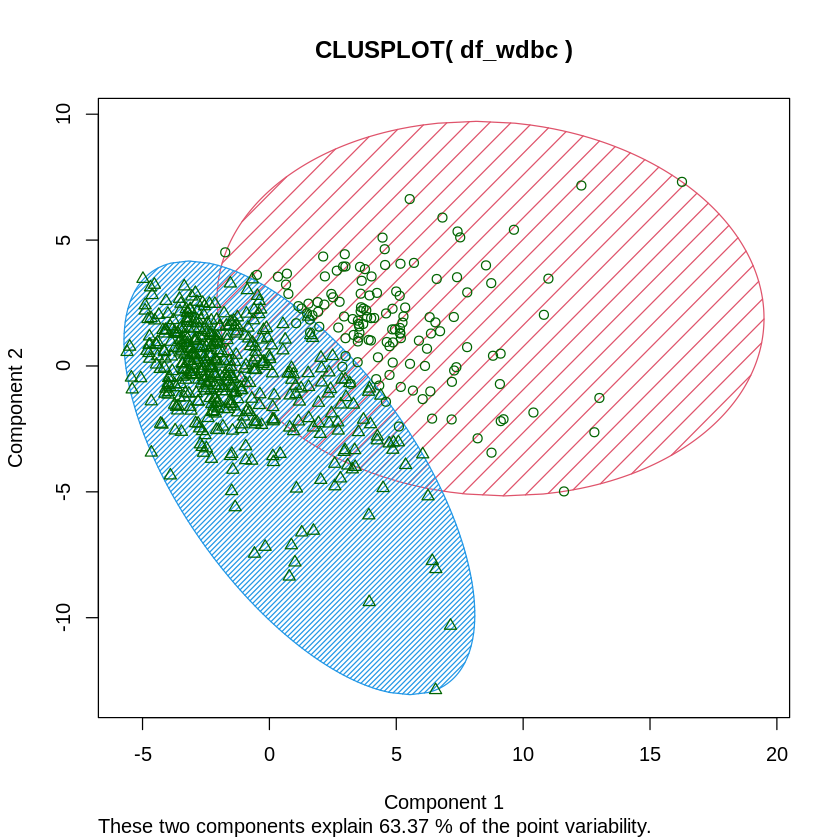

In [39]:
 clusplot(df_wdbc, cluster_2, color=T, shade=T, labels=0, lines=0)

In [40]:
kmeans_4 <- kmeans(df_wdbc[,2:31], centers = 4, nstart = 5)
kmeans_4 

K-means clustering with 4 clusters of sizes 19, 101, 268, 181

Cluster means:
  radius_mean texture_mean perimeter_mean area_mean smoothness_mean
1    23.40158     22.76211      156.14737 1729.4211      0.10415421
2    18.97832     21.61802      125.33663 1124.3069      0.10071465
3    11.37466     18.03381       72.99836  401.8888      0.09414078
4    14.52254     19.48536       94.70177  654.7608      0.09639867
  compactness_mean concavity_mean concativitypoints_mean symmetry_mean
1       0.17192211      0.2390158             0.13485789     0.1858842
2       0.14465950      0.1688143             0.09668198     0.1919921
3       0.07998847      0.0449433             0.02351195     0.1775664
4       0.11080652      0.0933175             0.05086526     0.1799464
  fractal_dimension_mean radius_se texture_se perimeter_se   area_se
1             0.05914526 1.1910000   1.254079     8.563579 191.44947
2             0.06064931 0.6771297   1.229350     4.761584  81.45089
3             0.0644

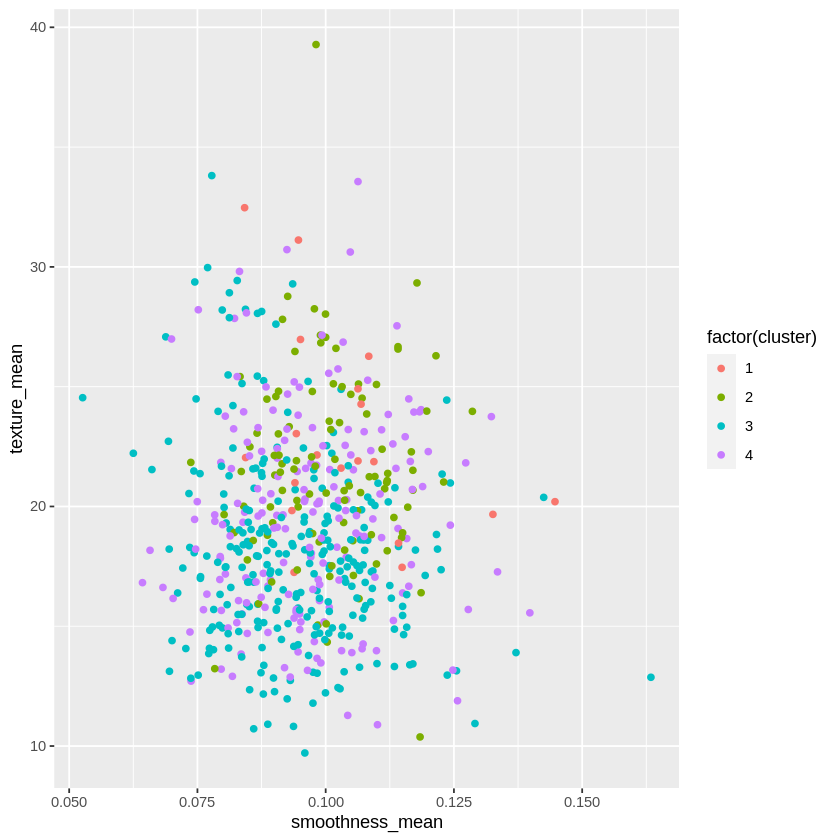

In [41]:
#extract cluster assignment vector
cluster_4 <- kmeans_4$cluster
df_km4 <- mutate(df_wdbc, cluster = cluster_4) 
ggplot(df_km4, aes(x = smoothness_mean, y = texture_mean, color = factor(cluster))) +
geom_point()

In [42]:
table(cluster_4, df_wdbc$class)

         
cluster_4   B   M
        1   0  19
        2   1 100
        3 262   6
        4  94  87

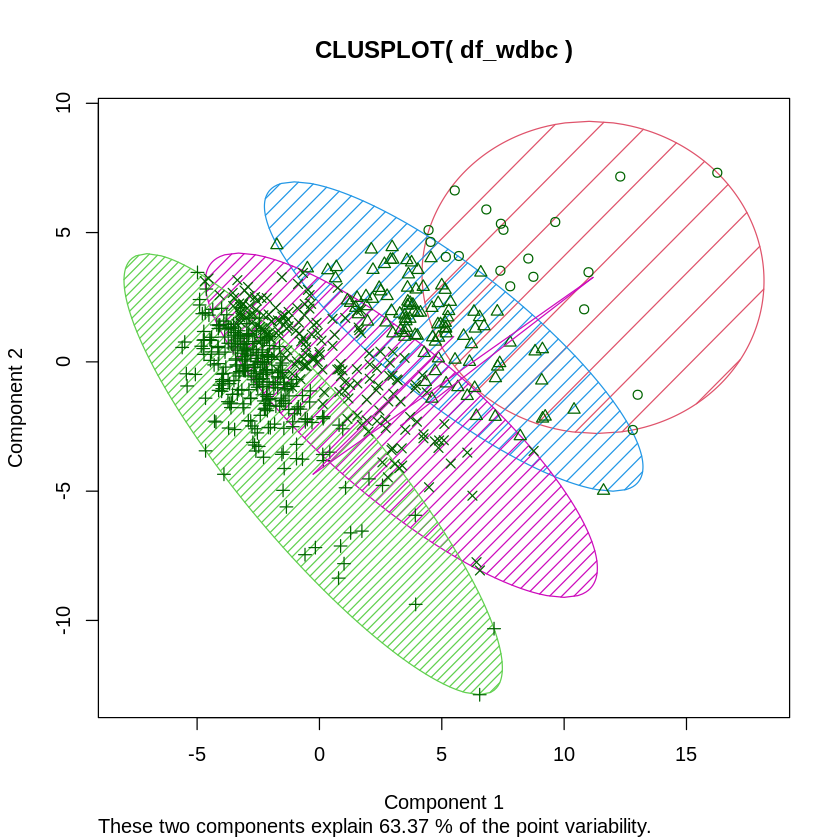

In [43]:
 clusplot(df_wdbc, cluster_4, color=T, shade=T, labels=1, lines=1)

### Hierarchical clustering

In [44]:
#load packages
install.packages("dendextend") 
library(dendextend) 
install.packages("circlize") 
library(circlize)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘viridis’



---------------------
Welcome to dendextend version 1.15.1
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:rpart’:

    prune


The following object is masked from ‘package:stats’:

    cutree


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘GlobalOptions’, ‘shape’


circlize version 0.4.12
CRAN page: https://cran.r-project

In [45]:
train <- df_wdbc[,2:31]
label <- df_wdbc[,1]

In [46]:
pr_train <- prcomp(train, scale = FALSE)
summary(pr_train)

Importance of components:
                           PC1      PC2      PC3     PC4     PC5     PC6   PC7
Standard deviation     666.170 85.49912 26.52987 7.39248 6.31585 1.73337 1.347
Proportion of Variance   0.982  0.01618  0.00156 0.00012 0.00009 0.00001 0.000
Cumulative Proportion    0.982  0.99822  0.99978 0.99990 0.99999 0.99999 1.000
                          PC8    PC9   PC10   PC11    PC12    PC13    PC14
Standard deviation     0.6095 0.3944 0.2899 0.1778 0.08659 0.05623 0.04649
Proportion of Variance 0.0000 0.0000 0.0000 0.0000 0.00000 0.00000 0.00000
Cumulative Proportion  1.0000 1.0000 1.0000 1.0000 1.00000 1.00000 1.00000
                          PC15   PC16    PC17    PC18    PC19    PC20     PC21
Standard deviation     0.03642 0.0253 0.01936 0.01534 0.01359 0.01281 0.008838
Proportion of Variance 0.00000 0.0000 0.00000 0.00000 0.00000 0.00000 0.000000
Cumulative Proportion  1.00000 1.0000 1.00000 1.00000 1.00000 1.00000 1.000000
                          PC22     PC23   

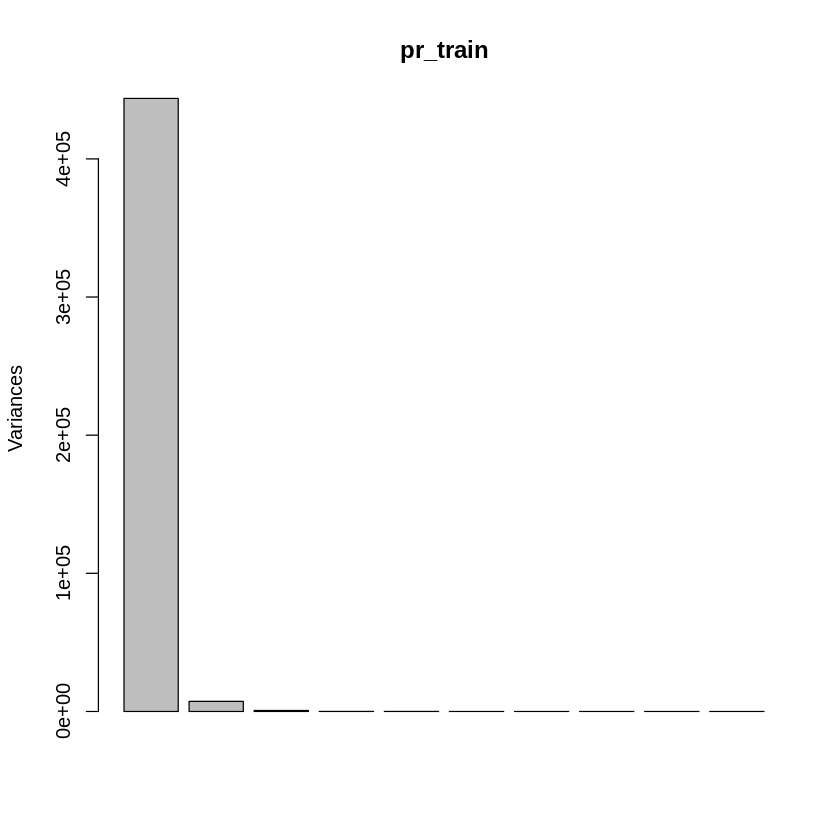

In [47]:
plot(pr_train)

In [48]:
dist_pca <- dist(pr_train$x[,1:2], method = "euclidean") 
#create a hierarchical cluster model: hclust_pca 
hclust_pca <- hclust(dist_pca, method = "complete") 

#get summary
summary(hclust_pca)
#get clusters from the model
clusters_pca2 <- cutree(hclust_pca , k = 2)

            Length Class  Mode     
merge       1136   -none- numeric  
height       568   -none- numeric  
order        569   -none- numeric  
labels         0   -none- NULL     
method         1   -none- character
call           3   -none- call     
dist.method    1   -none- character

Warning message in plot.window(...):
“"hang" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"hang" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"hang" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"hang" is not a graphical parameter”
Warning message in title(...):
“"hang" is not a graphical parameter”


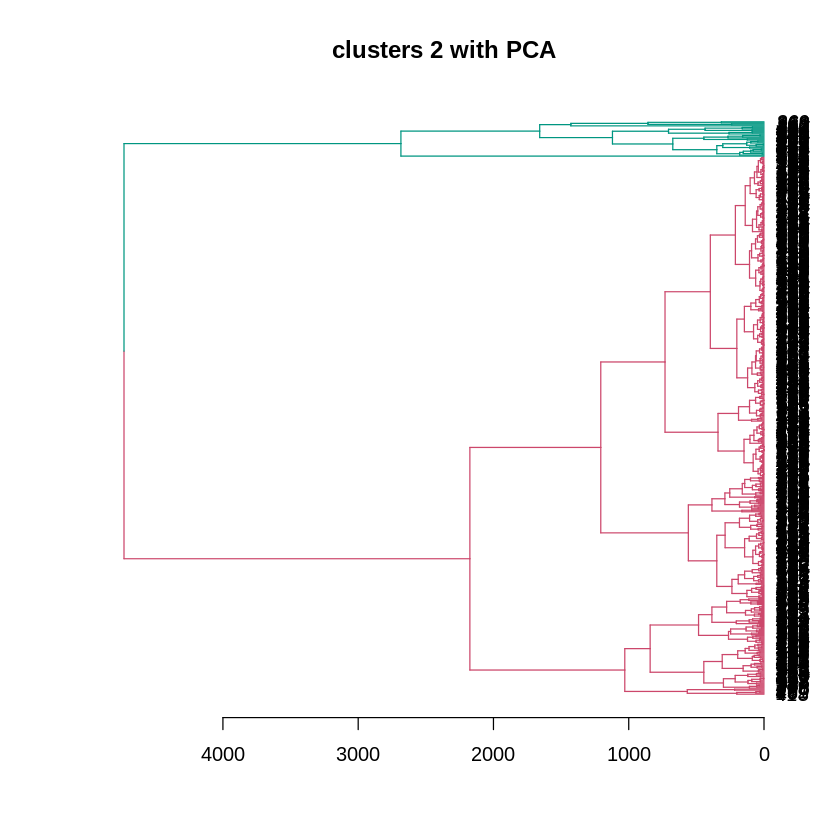

In [49]:
#plot a dendogram of the model: hclust_pca
dend_pca <- as.dendrogram(hclust_pca) 
dend_pca <- color_branches(dend_pca, k=2) 
#par(cex=0.3, mar=c(5, 8, 4, 1))
par(cex=1,font=3)
plot(dend_pca, hang=-1,main = "clusters 2 with PCA", horiz = TRUE)

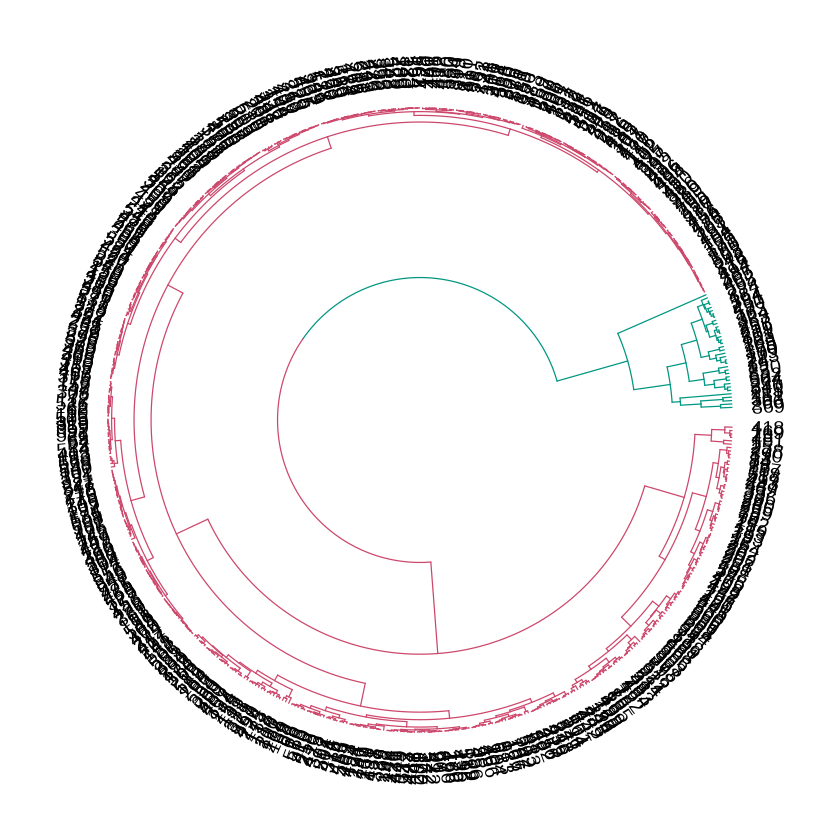

In [50]:
circlize_dendrogram(dend_pca)

In [51]:
table(clusters_pca2, label)

             label
clusters_pca2   B   M
            1 357 177
            2   0  35

In [52]:
#get clusters from the model: 2 without pca 
scale_data <- scale(train)
dist_scale <- dist(scale_data)

hclustscale <- hclust(dist_scale, method = "complete")
summary(hclustscale)

clusters_2 <- cutree(hclustscale , k = 2)

            Length Class  Mode     
merge       1136   -none- numeric  
height       568   -none- numeric  
order        569   -none- numeric  
labels         0   -none- NULL     
method         1   -none- character
call           3   -none- call     
dist.method    1   -none- character

In [53]:
table(clusters_2, label)

          label
clusters_2   B   M
         1 357 210
         2   0   2

In [54]:
#study how important it is to scale the data before building model 
dist_scale <- dist(train)

hclust <- hclust(dist_scale, method = "complete")
summary(hclust)

clusters_no_scale <- cutree(hclust , k = 2)

            Length Class  Mode     
merge       1136   -none- numeric  
height       568   -none- numeric  
order        569   -none- numeric  
labels         0   -none- NULL     
method         1   -none- character
call           3   -none- call     
dist.method    1   -none- character

In [55]:
table(clusters_no_scale, label)

                 label
clusters_no_scale   B   M
                1 357 192
                2   0  20

### Classification Trees

In [56]:
#build classification tree
tree_model <- rpart(class ~., data = train_data, method = "class")
summary(tree_model)

Call:
rpart(formula = class ~ ., data = train_data, method = "class")
  n= 400 

          CP nsplit  rel error    xerror       xstd
1 0.81578947      0 1.00000000 1.0000000 0.06386664
2 0.05921053      1 0.18421053 0.2697368 0.03990852
3 0.03947368      2 0.12500000 0.2302632 0.03717978
4 0.01000000      3 0.08552632 0.2039474 0.03518199

Variable importance
             area_worst            radius_worst         perimeter_worst 
                     16                      16                      15 
              area_mean             radius_mean          perimeter_mean 
                     14                      14                      14 
concativitypoints_worst  concativitypoints_mean         concavity_worst 
                      3                       1                       1 
         concavity_mean       compactness_worst           texture_worst 
                      1                       1                       1 
         symmetry_worts            texture_mean 
     

class                                                           
4  0.02  when area_worst <  885 & concativitypoints_worst <  0.14  
10 0.29  when area_worst <  885 & concativitypoints_worst >= 0.14 &
11 0.94  when area_worst <  885 & concativitypoints_worst >= 0.14 &
3  0.97  when area_worst >= 885                                    
                         cover
4                      59%    
10 texture_worst <  26  4%    
11 texture_worst >= 26  4%    
3                      33%

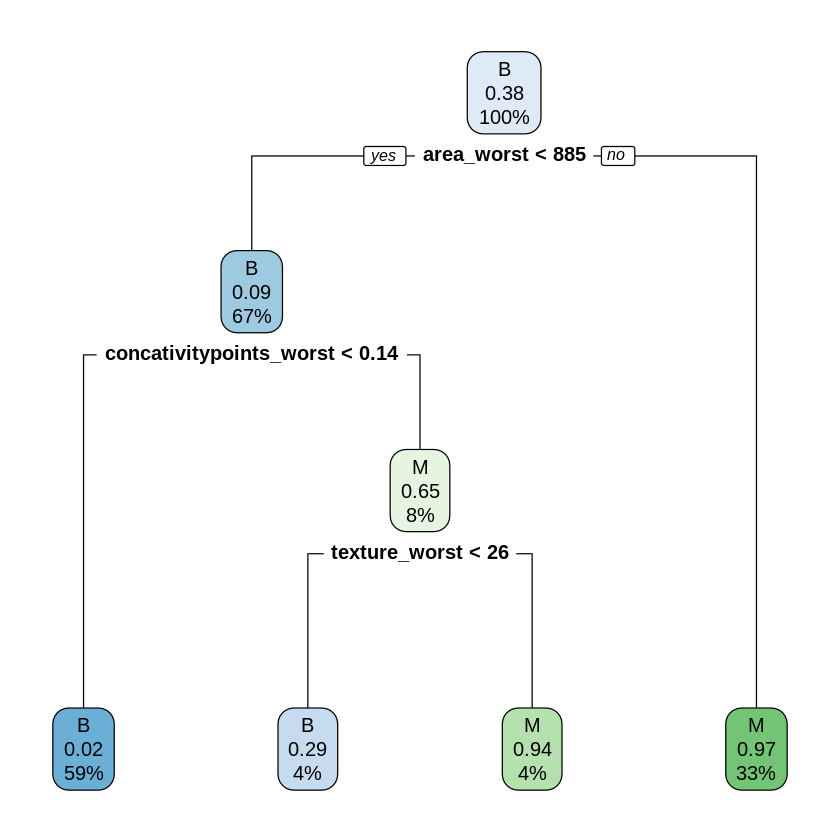

In [57]:
rpart.plot(tree_model, fallen.leaves = TRUE) 
rpart.rules(tree_model, cover = TRUE)

In [58]:
test_data$pred <- predict(tree_model, test_data, type = "class") 

In [59]:
mean(test_data$pred == test_data$class)

[1] 0.9349112

### Bagged Trees

In [60]:
library(ipred)

In [61]:
model <- bagging(formula = class ~., 
                        data = train_data,
                        coob = TRUE)
model


Bagging classification trees with 25 bootstrap replications 

Call: bagging.data.frame(formula = class ~ ., data = train_data, coob = TRUE)

Out-of-bag estimate of misclassification error:  0.055 


In [62]:
pred <- predict(object = model, 
                newdata = test_data,  
                type = "class") 

In [63]:
confusionMatrix(data = pred,       
                reference = test_data$class) 

Confusion Matrix and Statistics

          Reference
Prediction   B   M
         B 102   5
         M   7  55
                                          
               Accuracy : 0.929           
                 95% CI : (0.8793, 0.9628)
    No Information Rate : 0.645           
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8461          
                                          
 Mcnemar's Test P-Value : 0.7728          
                                          
            Sensitivity : 0.9358          
            Specificity : 0.9167          
         Pos Pred Value : 0.9533          
         Neg Pred Value : 0.8871          
             Prevalence : 0.6450          
         Detection Rate : 0.6036          
   Detection Prevalence : 0.6331          
      Balanced Accuracy : 0.9262          
                                          
       'Positive' Class : B               
                              

In [64]:
model$mtrees[1]

[[1]]
$bindx
  [1]  85 161 326 162  31 240 318 163 240 278 213 221  57  67 371 313 317 208
 [19] 131 264 395 248 337 169 299 353 135   8 314 173  44 249 267 357 386 229
 [37] 196 277 346 208 374  55  29 201  88 197 391 148  35  17 295 325 140  64
 [55] 279 363 148 160 310 110 128 126 340 250 224 314  61 278 386 155 162  77
 [73] 104 209 318  77  45 363 394  61 229  97 255 396 102  67 341 171 120 284
 [91] 129 204 119   6 148 222 140 198  98 337 196 279 242 170 135  70 312  78
[109] 289 281  74 103 358 314 144 295 281 216 227 196  67 326  53 347 171 308
[127] 323 239  23 188 299 194 158 108  75 379 285 155 348 301 328 260 343 288
[145]   8 327 226 284 347 185 366 336 224  96 317  42  88 207 145 211 332 234
[163] 226 294 357 107  69  16 327 219 371 348 171  16 270 384 148  69  39 333
[181] 123 394 367 229 127 311 186 349 273 100 156  27 400 221  49 262 266  31
[199] 162 328  76 345 284 208 394  75 199 208  94 359 253 192 131   4 258 122
[217] 176 327 162  60 257 267 285 231 360 224 229 2

### Random Forest

In [65]:
install.packages("randomForest")
library(randomForest)
devtools::install_github("MI2DataLab/randomForestExplainer")
library(randomForestExplainer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin





xfun        (0.22  -> 0.23     ) [CRAN]
stringi     (1.5.3 -> 1.6.2    ) [CRAN]
pillar      (1.6.0 -> 1.6.1    ) [CRAN]
tibble      (3.1.1 -> 3.1.2    ) [CRAN]
dplyr       (1.0.5 -> 1.0.6    ) [CRAN]
hms         (1.0.0 -> 1.1.0    ) [CRAN]
lazyeval    (NA    -> 0.2.2    ) [CRAN]
RcppEigen   (NA    -> 0.3.3.9.1) [CRAN]
reshape     (NA    -> 0.8.8    ) [CRAN]
crosstalk   (NA    -> 1.1.1    ) [CRAN]
htmlwidgets (NA    -> 1.5.3    ) [CRAN]
rmarkdown   (2.7   -> 2.8      ) [CRAN]
ranger      (NA    -> 0.12.1   ) [CRAN]
ggrepel     (NA    -> 0.9.1    ) [CRAN]
GGally      (NA    -> 2.1.1    ) [CRAN]
DT          (NA    -> 0.18     ) [CRAN]


Installing 16 packages: xfun, stringi, pillar, tibble, dplyr, hms, lazyeval, RcppEigen, reshape, crosstalk, htmlwidgets, rmarkdown, ranger, ggrepel, GGally, DT

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpJh4vKI/remotes3a6af898bd/ModelOriented-randomForestExplainer-7afa8f0/DESCRIPTION’
─  preparing ‘randomForestExplainer’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘randomForestExplainer_0.10.1.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [66]:
sqrt(30)

[1] 5.477226

In [67]:
rf_6 <- randomForest(class ~., data = train_data,  mtry = 6, ntree = 500, importance = TRUE)
rf_6
# Predict outcomes
pred_6 <- predict(rf_6, newdata = test_data)


Call:
 randomForest(formula = class ~ ., data = train_data, mtry = 6,      ntree = 500, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 6

        OOB estimate of  error rate: 3.5%
Confusion matrix:
    B   M class.error
B 243   5  0.02016129
M   9 143  0.05921053

In [68]:
mean(pred_6 == test_data$class)                    
table(pred_6,test_data$class)

[1] 0.9526627

      
pred_6   B   M
     B 104   3
     M   5  57

In [69]:
min_depth_frame <- min_depth_distribution(rf_6)
head(min_depth_frame, n = 10)

tree variable                minimal_depth
1  1    concativitypoints_mean  2            
2  1    fractal_dimension_se    2            
3  1    fractal_dimension_worst 1            
4  1    perimeter_mean          4            
5  1    perimeter_se            2            
6  1    perimeter_worst         0            
7  1    radius_se               3            
8  1    texture_mean            1            
9  1    texture_worst           3            
10 2    area_mean               6

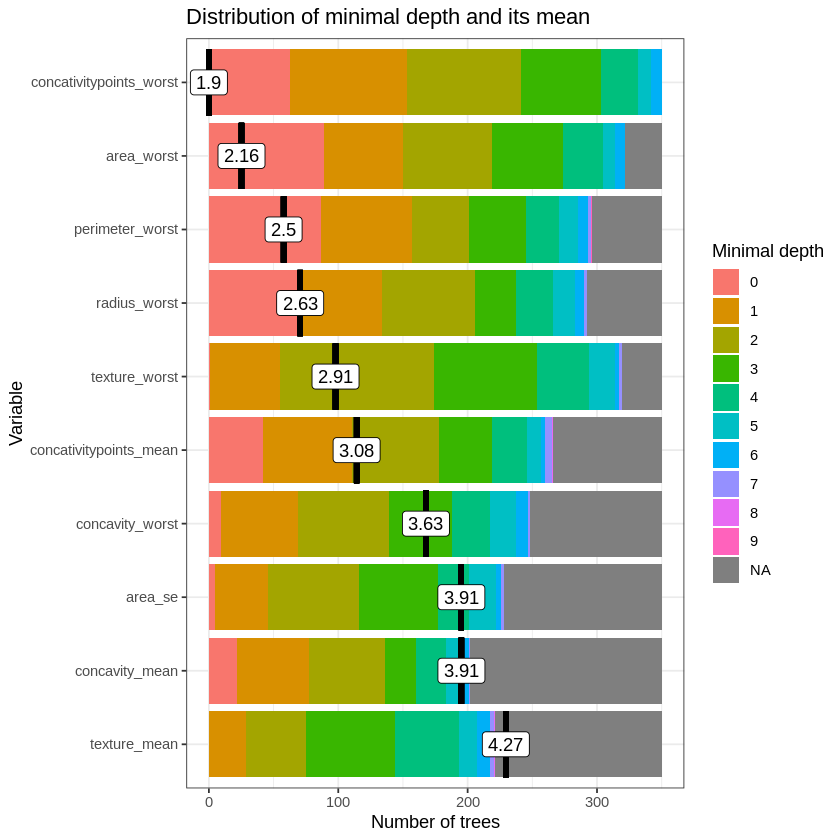

In [70]:
plot_min_depth_distribution(min_depth_frame)

In [71]:
rf_model <- randomForest(class ~., data = train_data,  mtry = 5, ntree = 500, importance = TRUE)
rf_model
# Predict outcomes
rf_pred <- predict(rf_model, newdata = test_data)


Call:
 randomForest(formula = class ~ ., data = train_data, mtry = 5,      ntree = 500, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 5

        OOB estimate of  error rate: 2.5%
Confusion matrix:
    B   M class.error
B 246   2 0.008064516
M   8 144 0.052631579

In [72]:
mean(rf_pred == test_data$class)                    
table(rf_pred,test_data$class)

[1] 0.9526627

       
rf_pred   B   M
      B 104   3
      M   5  57

B          M           MeanDecreaseAccuracy
radius_mean              8.6324012  6.37121139  9.8775698          
texture_mean             6.3209833  6.60711991  8.5888704          
perimeter_mean           6.4705047  5.92331857  7.9729555          
area_mean                8.2245136  5.53586415  8.6958889          
smoothness_mean          1.3806285  5.12489120  5.0990901          
compactness_mean         4.3556903  3.04342273  5.3430646          
concavity_mean           8.8582909  5.70066889 10.8005536          
concativitypoints_mean  10.0539598  9.22943633 13.5508874          
symmetry_mean            0.6493720  4.72286330  3.8450070          
fractal_dimension_mean   2.3146080  1.60407370  2.9201315          
radius_se                7.0585270  6.74414282  9.8926560          
texture_se               2.4430512  0.26930994  2.0721640          
perimeter_se             5.7236638  5.60388537  8.3212098          
area_se                 10.5150026  7.56491364 13.0845644          
smoothness_se           -0.4421213  0.05269708 -0.3645743          
compactness_se           4.6985904  2.30814074  5.2971028          
concavitty_se            3.0723075  1.38585000  2.9271168          
concativitypoints_se     3.3743491  1.87258610  3.8065948          
symmetry_se              3.4310541  0.13934735  3.0787883          
fractal_dimension_se     2.5068829 -0.41475632  2.1430177          
radius_worst            13.3682450 10.32119253 15.3966653          
texture_worst            9.0416685 10.04694270 12.1926115          
perimeter_worst         13.8939351 12.19805572 17.1518475          
area_worst              14.6342615 11.24860306 16.2808569          
smoothness_worst         6.9020813  7.08587850  8.9127532          
compactness_worst        5.0746971  5.64712360  7.4942031          
concavity_worst          8.7061356  7.89569524 11.8400971          
concativitypoints_worst 13.7059860 11.31753061 17.3685240          
symmetry_worts           5.4286510  7.50892467  8.7091196          
fractal_dimension_worst  3.6377742  2.33796660  4.5495904          
                        MeanDecreaseGini
radius_mean             11.7576766      
texture_mean             2.4697170      
perimeter_mean           7.9799281      
area_mean                9.8666187      
smoothness_mean          1.1091161      
compactness_mean         1.4363636      
concavity_mean           8.3940064      
concativitypoints_mean  15.8608667      
symmetry_mean            0.8481215      
fractal_dimension_mean   0.6230020      
radius_se                3.0873257      
texture_se               1.0447224      
perimeter_se             2.5092273      
area_se                  7.7919498      
smoothness_se            0.5611246      
compactness_se           0.7099766      
concavitty_se            0.7020285      
concativitypoints_se     0.8679733      
symmetry_se              0.6373952      
fractal_dimension_se     0.9150653      
radius_worst            19.1693317      
texture_worst            3.0255098      
perimeter_worst         26.0444775      
area_worst              22.4654558      
smoothness_worst         2.1388328      
compactness_worst        3.1487598      
concavity_worst          5.6322239      
concativitypoints_worst 23.4590384      
symmetry_worts           2.5833451      
fractal_dimension_worst  0.9988094

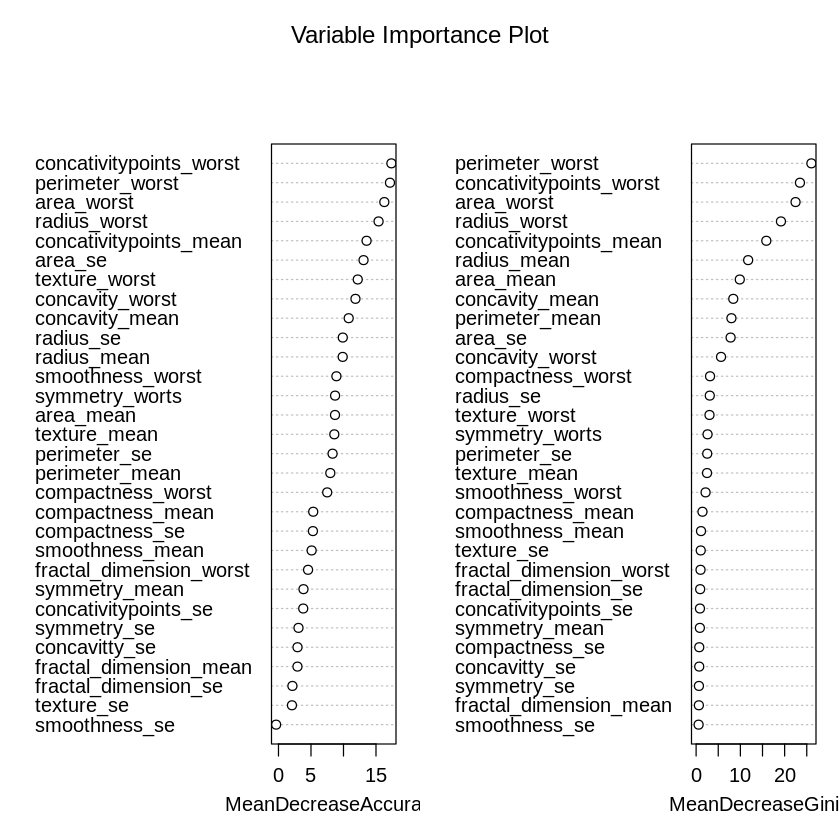

In [73]:
importance(rf_model)
varImpPlot(rf_model, main = "Variable Importance Plot")

In [74]:
min_depth_frame <- min_depth_distribution(rf_model)
head(min_depth_frame, n = 10)

tree variable               minimal_depth
1  1    area_worst             0            
2  1    compactness_mean       4            
3  1    concavity_worst        1            
4  1    perimeter_se           3            
5  1    perimeter_worst        3            
6  1    smoothness_worst       2            
7  1    symmetry_mean          4            
8  1    texture_worst          1            
9  2    area_se                3            
10 2    concativitypoints_mean 4

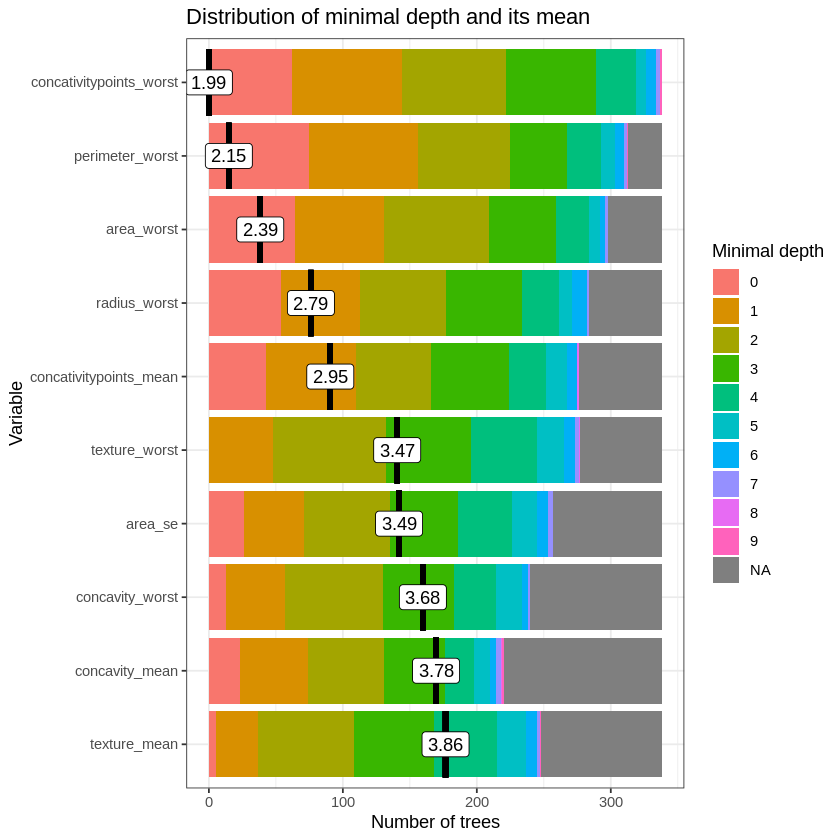

In [75]:
plot_min_depth_distribution(min_depth_frame)

### Neural Network

In [76]:
install.packages("keras")
install.packages("mltools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘config’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [77]:
library(keras)
library(mltools)
library(data.table)


Attaching package: ‘mltools’


The following object is masked from ‘package:tidyr’:

    replace_na


The following object is masked from ‘package:e1071’:

    skewness



Attaching package: ‘data.table’


The following object is masked from ‘package:dendextend’:

    set


The following object is masked from ‘package:naivebayes’:

    tables


The following object is masked from ‘package:purrr’:

    transpose


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [78]:
onehot_train <- one_hot(as.data.table(train_data$class))
onehot_test <- one_hot(as.data.table(test_data$class))

y_train <- as.matrix(onehot_train)
y_test <- as.matrix(onehot_test)

In [79]:
X_train = as.matrix(train_data[,2:31])
X_test = as.matrix(test_data[,2:31])

In [80]:
dim(X_train) 
dim(X_test)
dim(y_train)

[1] 400  30

[1] 169  30

[1] 400   2

In [81]:
model <- keras_model_sequential() 
model %>% 
  layer_dense(units = 48, 
              activation = 'relu', 
              input_shape = c(400,30)) %>% 
  layer_dropout(rate = 0.25) %>% 
  layer_dense(units = 24, activation = 'relu') %>%
  layer_dropout(rate = 0.25) %>%
  layer_dense(units = 16, activation = 'relu') %>%
  layer_dropout(rate = 0.25) %>%
  layer_dense(units = 2, activation = 'softmax')

summary(model)

Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_3 (Dense)                     (None, 400, 48)                 1488        
________________________________________________________________________________
dropout_2 (Dropout)                 (None, 400, 48)                 0           
________________________________________________________________________________
dense_2 (Dense)                     (None, 400, 24)                 1176        
________________________________________________________________________________
dropout_1 (Dropout)                 (None, 400, 24)                 0           
________________________________________________________________________________
dense_1 (Dense)                     (None, 400, 16)                 400         
________________________________________________________________________________
dropout 

In [82]:
#compile and fit the model
model %>% compile(
     loss = 'binary_crossentropy',
      optimizer = optimizer_rmsprop(),
      metrics = c('accuracy')
 )


In [83]:
# Fit the model 
model %>% fit(
     X_train, 
     y_train, 
     epochs = 5, batch_size = 32, verbose = 1, 
     validation_split = 0.1
 )

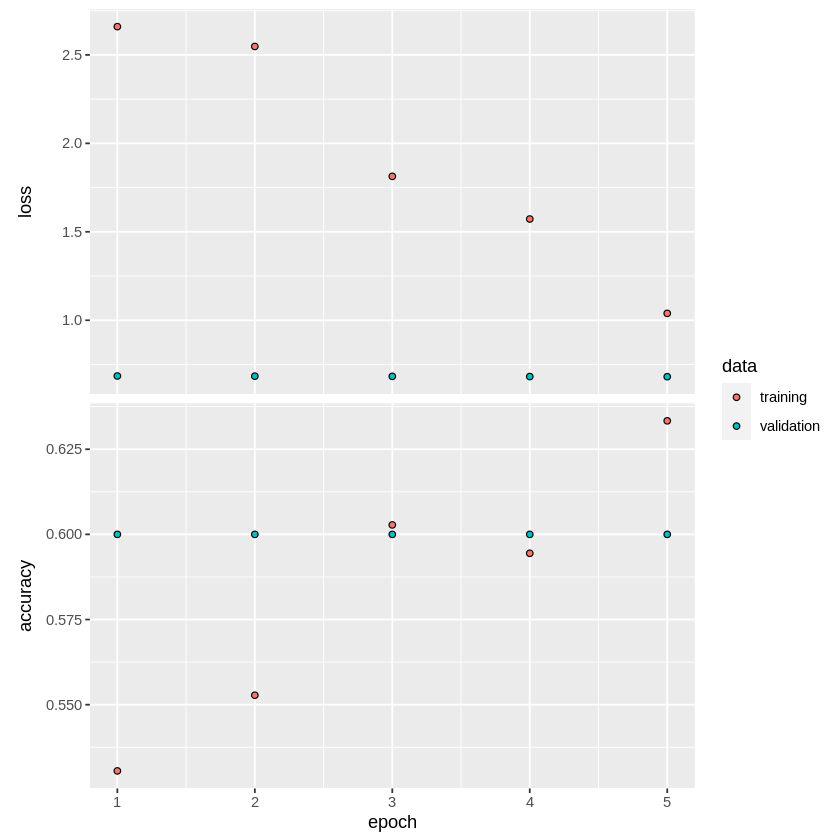

In [84]:
history <- model %>% fit(X_train, y_train, epochs = 5, batch_size = 32, validation_split = 0.1)
plot(history)

In [85]:
# Evaluate the model
score <- model %>% evaluate(X_test, y_test, batch_size = 128)

# Print the score
print(score)

     loss  accuracy 
0.6741934 0.6449704 


In [86]:
model_1 <- keras_model_sequential() 
model_1 %>% 
  layer_dense(units = 8, 
              activation = 'relu', 
              input_shape = c(400,30)) %>% 
  layer_dense(units = 4, activation = 'relu') %>%
  layer_dense(units = 2, activation = 'softmax')

summary(model_1)

Model: "sequential_1"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_6 (Dense)                     (None, 400, 8)                  248         
________________________________________________________________________________
dense_5 (Dense)                     (None, 400, 4)                  36          
________________________________________________________________________________
dense_4 (Dense)                     (None, 400, 2)                  10          
Total params: 294
Trainable params: 294
Non-trainable params: 0
________________________________________________________________________________


In [87]:
#compile and fit the model
model_1 %>% compile(
     loss = 'binary_crossentropy',
      optimizer = optimizer_rmsprop(),
      metrics = c('accuracy')
 )

In [88]:
# Fit the model 
model_1 %>% fit(
     X_train, 
     y_train, 
     epochs = 10, batch_size = 32, verbose = 1, 
     validation_split = 0.1
 )

`geom_smooth()` using formula 'y ~ x'



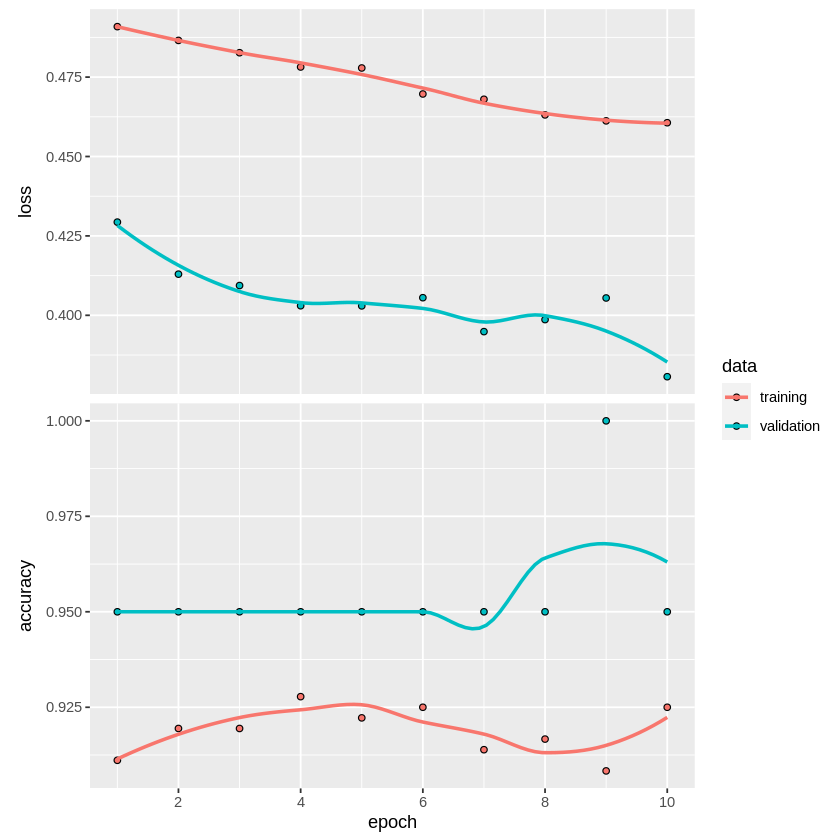

In [89]:
history_1 <- model_1 %>% fit(X_train, y_train, epochs = 10, 
                        batch_size = 32, validation_split = 0.1)
plot(history_1)

In [90]:
# Evaluate the model
score <- model_1 %>% evaluate(X_test, y_test, batch_size = 32)

# Print the score
print(score)

     loss  accuracy 
0.4657255 0.9171597 


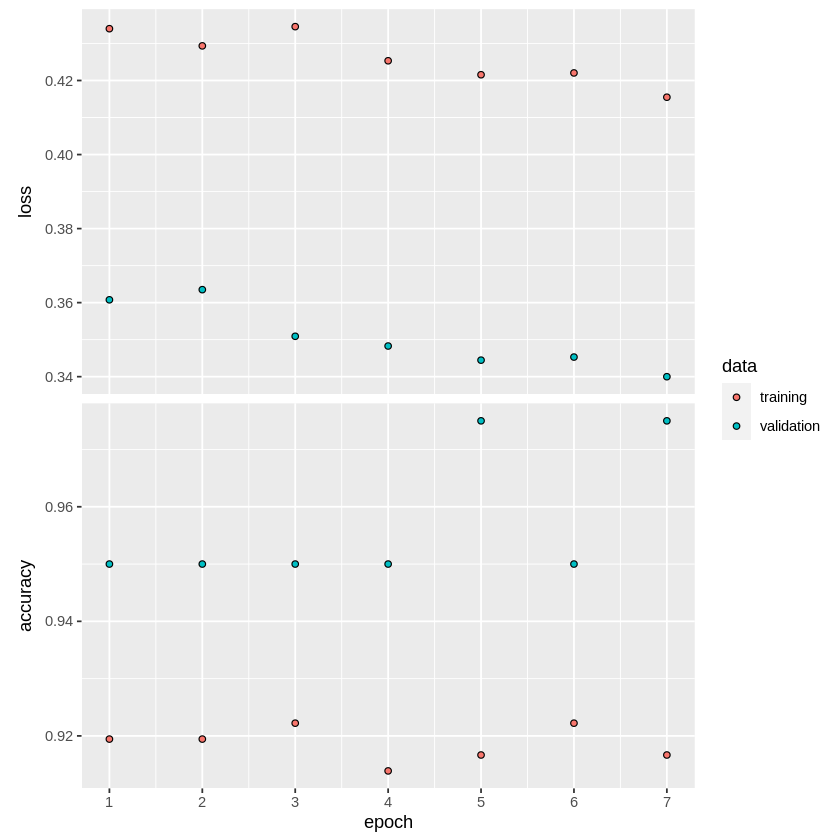

In [91]:
# Fit the model 
model_1 %>% fit(
     X_train, 
     y_train, 
     epochs = 7, batch_size = 32, verbose = 1, 
     validation_split = 0.1
 )

history_1 <- model_1 %>% fit(X_train, y_train, epochs = 7, 
                        batch_size = 32, validation_split = 0.1)
plot(history_1)

In [92]:
# Evaluate the model
score <- model_1 %>% evaluate(X_test, y_test, batch_size = 32)

# Print the score
print(score)

     loss  accuracy 
0.4310352 0.9230769 
